# Inverstigation of EDP

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }<\style>"))

In [3]:
import datetime
print(datetime.datetime.now())

2019-02-19 16:28:19.058690


In [4]:
%matplotlib inline

In [5]:
import matplotlib.pyplot as plt

In [6]:
from __future__ import division
import pandas as pd ; pd.set_option("display.max_columns",200)
import numpy as np
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col

In [7]:
3

3

In [8]:
result_path = u"C:/Users/IMPTEMP_A_PACIFIC/Desktop/EDP_2016/Program/Program_only_married_couples/hdf_married_couples/"

In [9]:
df = pd.read_hdf(result_path+"married_couples_step_last.h5", "fiscr")

In [10]:
threshold_byr_rbg = pd.DataFrame()
threshold_byr_rbg["2011"] = pd.Series([63233,73516,94451,115185,135941,150684])
threshold_byr_rbg["2014"] = pd.Series([58291,63530,73806,84103,94368,104633])

We define the taxable income (Revenu Brut Global) based on the 7 income categories present in the database.

In [11]:
household_income_vars = ["ZTSAM", "ZRAGM", "ZRACM","ZRNCM", "ZFONM", "ZPERM","ZRICM"]
for var in household_income_vars:
    df["Delta_{}".format(var)] = df["{}_2014".format(var)] - df["{}_2011".format(var)]

In [12]:
threshold_byr_rbg = pd.DataFrame()
threshold_byr_rbg["2011"] = pd.Series([63233,73516,94451,115185,135941,150684])
threshold_byr_rbg["2014"] = pd.Series([58291,63530,73806,84103,94368,104633])

(50000, 160000)

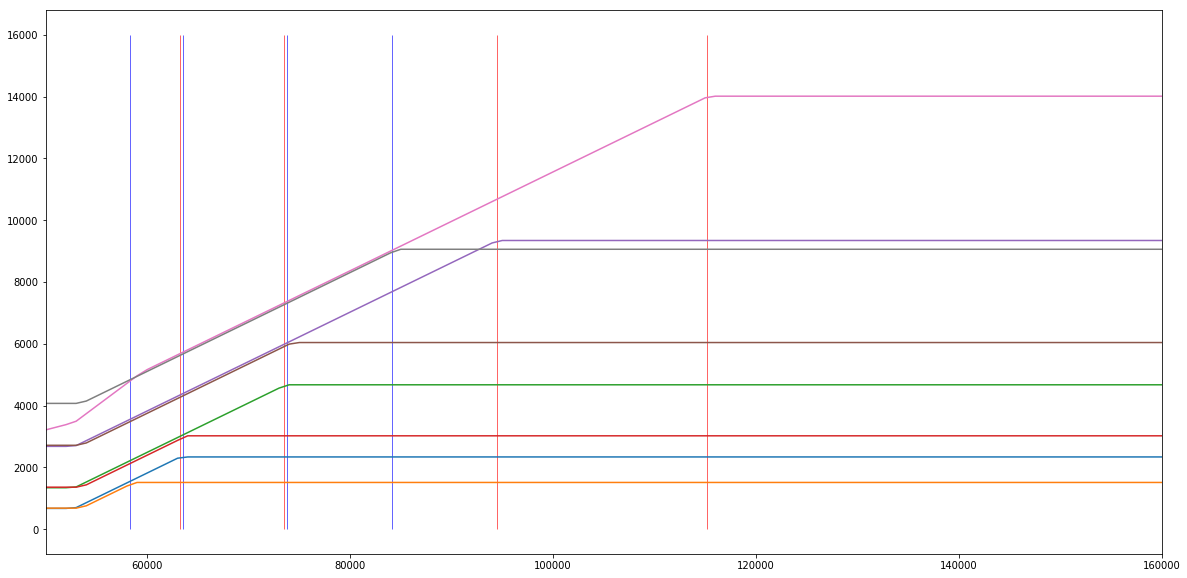

In [13]:
import importlib
year = 2014

ir_2014 = importlib.import_module("Irpp_formulas.IRPP_from_scratch_civil_union")

ir_2011 = importlib.import_module("Irpp_formulas.IRPP_from_scratch_civil_union_{}".format(2011))

dict_gain_ir_2011_by_child = dict()
dict_gain_ir_2014_by_child = dict()
for child in range(1,6):
    ir_x_children = ir_2011.ir_avec_plafond_qf_enfant(pd.Series(
        range(0,2*10**5, 1000)), ir_2014.parts_fiscales_enfants(pd.Series([child]*200).astype("float")))
    ir_0_children = ir_2011.ir_avec_plafond_qf_enfant(pd.Series(
        range(0,2*10**5, 1000)), ir_2011.parts_fiscales_enfants(pd.Series([0.0]*200).astype("float")))
    dict_gain_ir_2011_by_child[child] = ir_0_children - ir_x_children 
    
    ir_x_children = ir_2014.ir_avec_plafond_qf_enfant(pd.Series(
        range(0,2*10**5, 1000)), ir_2014.parts_fiscales_enfants(pd.Series([child]*200).astype("float")))
    ir_0_children = ir_2014.ir_avec_plafond_qf_enfant(pd.Series(
        range(0,2*10**5, 1000)), ir_2014.parts_fiscales_enfants(pd.Series([0.0]*200).astype("float")))
    dict_gain_ir_2014_by_child[child] = ir_0_children - ir_x_children 
    
    
    

plt.figure(figsize=(20,10))
for child in range(1,5):
    plt.plot( pd.Series(range(0,2*10**5, 1000)),dict_gain_ir_2011_by_child[child])
    plt.plot( pd.Series(range(0,2*10**5, 1000)),dict_gain_ir_2014_by_child[child])
for thrsh in threshold_byr_rbg["2011"][0:4]:
    plt.vlines(thrsh, 0 , 16000, linewidth = 0.6, color = "r")
for thrsh in threshold_byr_rbg["2014"][0:4]:
    plt.vlines(thrsh, 0 , 16000, linewidth = 0.6, color = "b")
plt.xlim(50000,160000)

#ir_2011.ir_avec_plafond_qf_enfant(pd.Series(range(0,2*10**5, 1000)), ir.parts_fiscales_enfants(pd.Series([3.0]*200).astype("float"))).plot()

In [14]:
parts_fiscales_enfants = ir_2014.parts_fiscales_enfants(df.NBPAC_2011)

In [15]:
df["Parts_fiscales_enfants"] = ir_2011.parts_fiscales_enfants(df.NBPAC_2011)
df["Parts_fiscales_enfants_2014"] = ir_2014.parts_fiscales_enfants(df.NBPAC_2014)

In [16]:
df["Irpp_2011"] = np.maximum(0, ir_2011.ir_avec_plafond_qf_enfant(df.Rbg_2011, parts_fiscales_enfants) - ir_2011.decote_ir(df.Rbg_2011, parts_fiscales_enfants))
df["Irpp_2014"] = np.maximum(0, ir_2014.ir_avec_plafond_qf_enfant(df.Rbg_2014, parts_fiscales_enfants) - ir_2014.decote_ir(df.Rbg_2014, parts_fiscales_enfants))

C:\Users\IMPTEMP_A_PACIFIC\Desktop\EDP_2016\Program\Program_only_married_couples\Irpp_formulas\IRPP_from_scratch_civil_union_2011.py:24: RuntimeWarning: invalid value encountered in minimum
  a = np.maximum(np.minimum(base1, thresholds1[:, 1:]) - thresholds1[:, :-1], 0)
C:\Users\IMPTEMP_A_PACIFIC\Desktop\EDP_2016\Program\Program_only_married_couples\Irpp_formulas\IRPP_from_scratch_civil_union_2011.py:24: RuntimeWarning: invalid value encountered in maximum
  a = np.maximum(np.minimum(base1, thresholds1[:, 1:]) - thresholds1[:, :-1], 0)
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in maximum
  """Entry point for launching an IPython kernel.


(353928, 524)


(0, 15000)

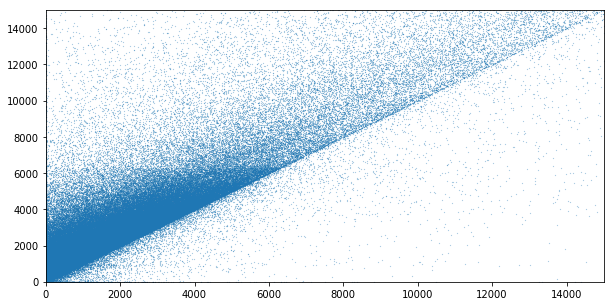

In [17]:
df_temp = df.query("(NBPAC_2011 >=1) & (NBPAC_2011==NBPAC_2014) ")
print(df_temp.shape)
fig = plt.figure(figsize=(10,5))
plt.scatter(df_temp.ZIMPOM_2011,df_temp.Irpp_2011, s=0.02 )
plt.xlim(0,15000)
plt.ylim(0,15000)

(330234, 524)


(0, 15000)

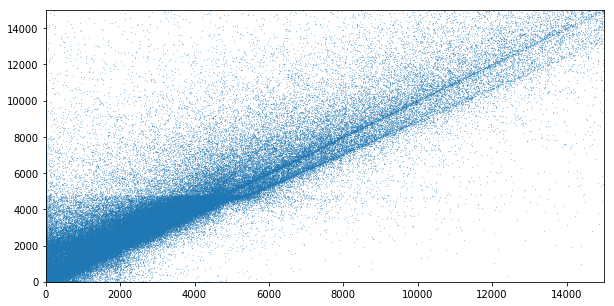

In [18]:
i

(353928, 524)


(0, 15000)

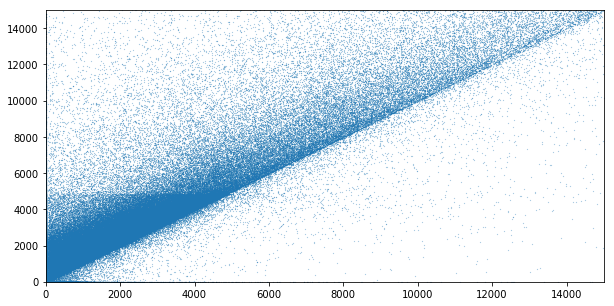

In [19]:
df_temp = df.query("(NBPAC_2011 >=1) & (NBPAC_2011==NBPAC_2014) ")
print(df_temp.shape)
fig = plt.figure(figsize=(10,5))
plt.scatter(df_temp.ZIMPOM_DECL_2014,df_temp.Irpp_2014, s=0.02 )
plt.xlim(0,15000)
plt.ylim(0,15000)

(106558, 524)


(0, 15000)

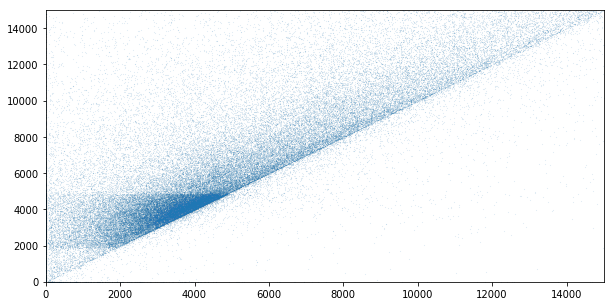

In [20]:
df_temp = df.query("(NBPAC_2011 >=1) & (NBPAC_2011==NBPAC_2014<4)&(50_000<Rbg_2011<200_000)")
print(df_temp.shape)
fig = plt.figure(figsize=(10,5))
plt.scatter(df_temp.ZIMPOM_DECL_2014,df_temp.Irpp_2014, s=0.002 )
plt.xlim(0,15000)
plt.ylim(0,15000)

## Needed variables

In [21]:
nb_enf_max_for_annalysis = 5

In [22]:
child_bool_list = ["child_{}".format(child) for child in  np.arange(1,nb_enf_max_for_annalysis+1)]
cumulative_child_bool_list = ["cumulative_child_{}".format(child) for child in  np.arange(1,nb_enf_max_for_annalysis+1)] 

In [23]:
all_thresholds = pd.concat([threshold_byr_rbg["2011"], threshold_byr_rbg["2014"]]).sort_values()
thrsh_bool_list = ["Threshold_{}".format(thrsh) for thrsh in  all_thresholds ]

In [24]:
between_threshold_for_child_rank = ["Between_threshold_{}_child".format(nb_child) for nb_child in range(1,nb_enf_max_for_annalysis+1)]
over_threshold_for_child_rank = ["Over_threshold_{}_child".format(nb_child) for nb_child in range(1,nb_enf_max_for_annalysis+1)]
children_number =  ["child_{}".format(nb_child) for nb_child in range(1,nb_enf_max_for_annalysis+1)]

interaction_child_between_threshold  = ["{}:{}".format(child,interaction) for child, interaction in zip(children_number, between_threshold_for_child_rank)]
interaction_child_over_threshold  = ["{}:{}".format(child,interaction) for child, interaction in zip(children_number, over_threshold_for_child_rank)]

In [25]:
hardcoded_over = ["Over_{}_X_{}_child".format(child,child) for child in range(1,nb_enf_max_for_annalysis+1)]
hardcoded_between = ["Between_{}_X_{}_child".format(child,child) for child in range(1,nb_enf_max_for_annalysis+1)]

### Income sample selection

In [26]:
df.shape

(789743, 524)

In [27]:
#Nouvelle version ou il faut appartenir à l'intervalle de revenu que sur un seule des deux années
df = df[((
            (df.Rbg_2011>50000)
            &(df.Rbg_2011<200000)
        )|(
            (df.Rbg_2014>50000)
            & (df.Rbg_2014<200000)))]

In [28]:
nb_enf_max_for_annalysis

5

In [29]:
df = df[df.NBPAC_2011<=nb_enf_max_for_annalysis]

In [30]:
age_max_parents = 62

In [31]:
print(((df.Age_mother>age_max_parents)|(df.Age_father>age_max_parents)).value_counts()) 
df = df[~((df.Age_mother>age_max_parents)|(df.Age_father>age_max_parents))]

False    211859
True      41972
dtype: int64


In [32]:
## On vire les variations extrèmes pour ne pas avoir de revenus négatifs.

In [33]:
low = 0.025
high = 0.975
quant_df = df.Delta_Rbg.quantile([low,high])
print(quant_df)
df = df[df.Delta_Rbg>quant_df.loc[low]]
df = df[df.Delta_Rbg<quant_df.loc[high]]

0.025   -40986.045
0.975    49689.305
Name: Delta_Rbg, dtype: float64


In [34]:
print(df.Rbg_2011.min())
print(df.Rbg_2014.min())
print(df.Rbg_2011.max())
print(df.Rbg_2014.max())


1666.8
9776.3
237328.0
246526.0


In [35]:
print((df.Rbg_2011<=1000).value_counts())
print((df.Rbg_2014<=1000).value_counts())

False    198752
Name: Rbg_2011, dtype: int64
False    198752
Name: Rbg_2014, dtype: int64


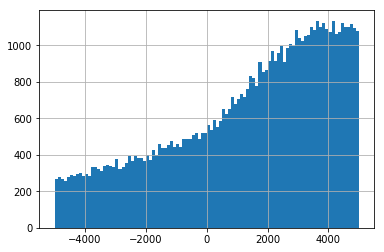

In [36]:
df.query("-5000<Delta_Rbg<5000").Delta_Rbg.hist(bins = 100)

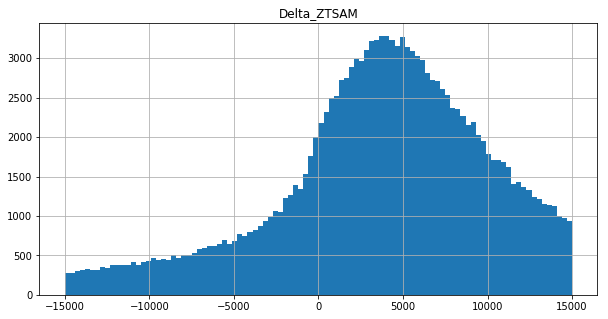

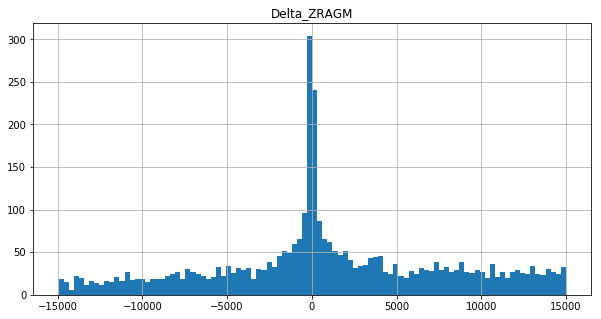

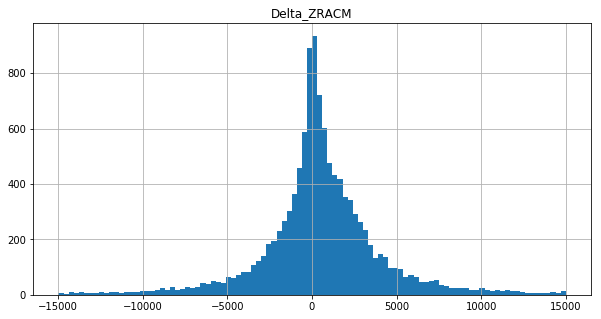

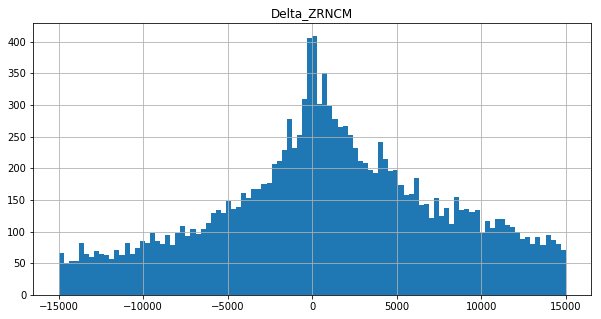

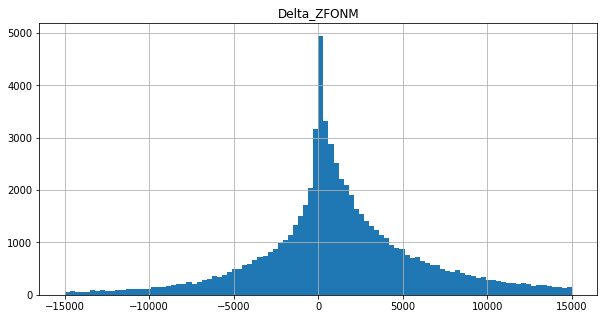

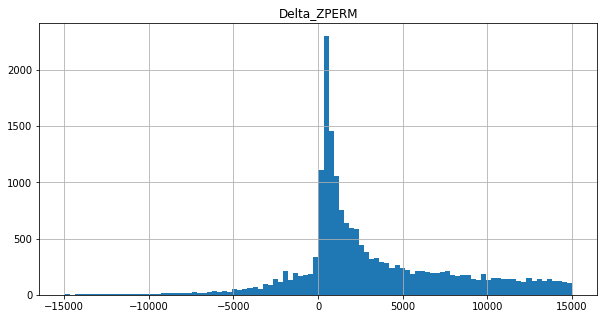

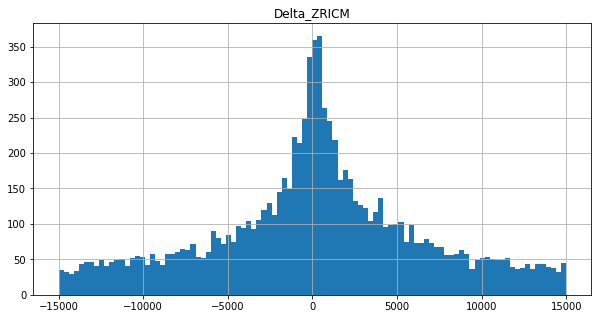

In [37]:
for var in household_income_vars:
    plt.figure(figsize=(10,5))
    df.query("(-15000<Delta_{}<15000) &(Delta_{}!=0)".format(var, var))["Delta_{}".format(var)].hist(bins = 100)
    plt.title("Delta_{}".format(var))

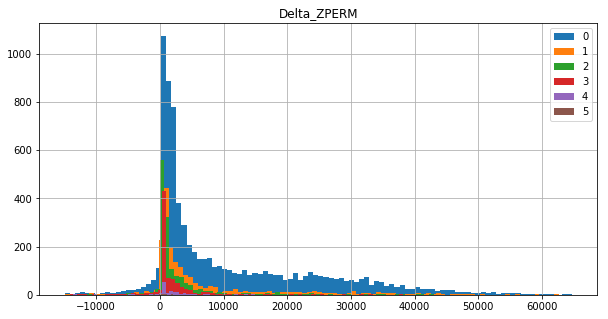

In [38]:
var = "ZPERM"
plt.figure(figsize=(10,5))
for nb_child in range(0,6):
    df.query("(-15000<Delta_{}<65000) &(Delta_{}!=0)&(ZPERM_2011>10000)&(NBPAC_2011==@nb_child)".format(var, var))["Delta_{}".format(var)].hist(bins = 100, label = "{}".format(nb_child))
plt.title("Delta_{}".format(var))
plt.legend()

Text(0.5,1,'Delta_ZPERM')

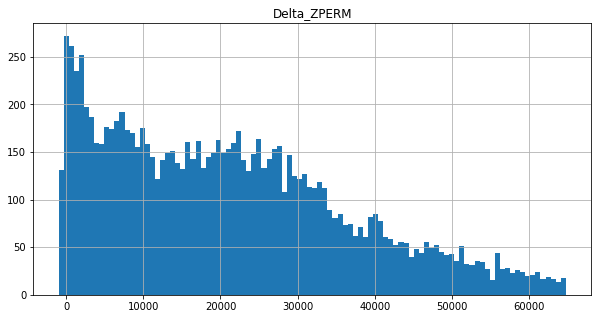

In [39]:
var = "ZPERM"
plt.figure(figsize=(10,5))
df.query("(-15000<Delta_{}<65000) &(Delta_{}!=0)&(ZPERM_2011<1000)".format(var, var))["Delta_{}".format(var)].hist(bins = 100)
plt.title("Delta_{}".format(var))

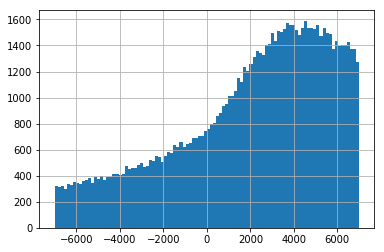

In [40]:
df.query("(-7000<Delta_Rbg<7000)").Delta_Rbg.hist(bins = 100)

In [41]:
(df.ZPERM_2014>0).value_counts(normalize = True)

False    0.853888
True     0.146112
Name: ZPERM_2014, dtype: float64

We have 28% of the sample that has retirement income. It creates a mass in the change in income at 2000 euros.

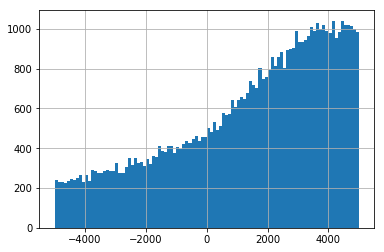

In [42]:
df.query("(-5000<Delta_Rbg<5000)&(ZPERM_2011<50)").Delta_Rbg.hist(bins = 100)

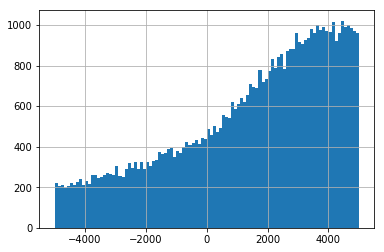

In [43]:
df.query("(-5000<Delta_Rbg<5000)&(ZPERM_2014<50)").Delta_Rbg.hist(bins = 100)

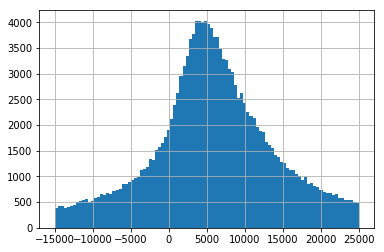

In [44]:
df.query("(-15000<Delta_Rbg<25000)&(ZPERM_2011<50)").Delta_Rbg.hist(bins = 100)

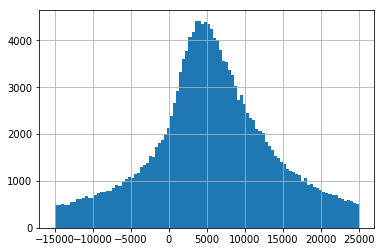

In [45]:
df.query("(-15000<Delta_Rbg<25000)").Delta_Rbg.hist(bins = 100)

In [46]:
(df.Rbg_2014==0).value_counts()

False    198752
Name: Rbg_2014, dtype: int64

In [47]:
df.query("NBPAC_2011<5").shape

(197738, 524)

In [48]:
df["Delta_NBPAC"] = df.NBPAC_2014 - df.NBPAC_2011

In [49]:
(df.Delta_NBPAC!=0).value_counts(normalize = True)

False    0.837753
True     0.162247
Name: Delta_NBPAC, dtype: float64

15% has experienced a birth or a child departure over the 2011,2014 period.  
We will focus our analysis only on households with a fixed family structure.

In [50]:
df.shape

(198752, 525)

In [51]:
df[df.NBPAC_2011 == df.NBPAC_2014].shape

(166505, 525)

### We only keep family structure children leaving such that households are not in the treatment anymore.
Not in the treatmen anymore:
- One or more children leave household
- Poor enough to be in treatment 0 with that new family situation.

In [52]:
#df = df[df.NBPAC_2011 >= df.NBPAC_2014]

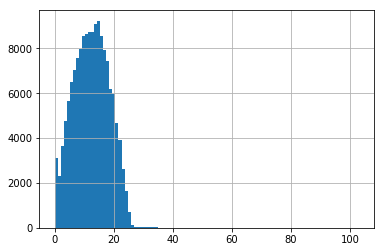

In [53]:
df[df.NBPAC_2011 >= df.NBPAC_2014].Age_eldest_child.hist(bins = 100)

In [55]:
threshold_byr_rbg = pd.DataFrame()
threshold_byr_rbg["2011"] = pd.Series([63233,73516,94451,115185,135941,150684])
threshold_byr_rbg["2014"] = pd.Series([58291,63530,73806,84103,94368,104633])

# Canonical (in article)

In [1]:
df["Rbg_splines"]  = pd.qcut(df.Rbg_2011, 30)

NameError: name 'pd' is not defined

In [57]:
no_attached = (df.TYPE_FISC_2014.str.count("[3-9]")<1)&(df.TYPE_FISC_2011.str.count("[3-9]")<1)
m = sm.OLS.from_formula("(Delta_rbg)~   {} ".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                    , df.query("((200000>Rbg_2011>50000)&(200000>Rbg_2014>50000))"+
                              "&(NBPAC_2011 == NBPAC_2014)&(@no_attached) ")) #SAME NBPAC
fit = m.fit()
summary = fit.summary(); print(summary)


                            OLS Regression Results                            
Dep. Variable:              Delta_rbg   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     123.6
Date:                Tue, 19 Feb 2019   Prob (F-statistic):               0.00
Time:                        16:29:15   Log-Likelihood:            -1.0075e+06
No. Observations:               93254   AIC:                         2.015e+06
Df Residuals:                   93228   BIC:                         2.015e+06
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

In [58]:
no_attached = (df.TYPE_FISC_2014.str.count("[3-9]")<1)&(df.TYPE_FISC_2011.str.count("[3-9]")<1)
m = sm.RLM.from_formula("(Delta_rbg)~   {} ".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                    , df.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))"+
                              "&(NBPAC_2011 == NBPAC_2014)&(@no_attached)&((Age_father<50)&(Age_mother<50)) ")) #SAME NBPAC
fit = m.fit()
summary = fit.summary(); print(summary)


                    Robust linear Model Regression Results                    
Dep. Variable:              Delta_rbg   No. Observations:                97775
Model:                            RLM   Df Residuals:                    97749
Method:                          IRLS   Df Model:                           25
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Tue, 19 Feb 2019                                         
Time:                        16:29:19                                         
No. Iterations:                    11                                         
                                                        coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------

## Delta ZIMPOM

In [59]:
df["ZTSAM_10_percent_2014"] =  df["ZTSAM_2014"]*0.9


df["Irpp_2014"] = np.maximum(0, ir_2014.ir_avec_plafond_qf_enfant(df.Rbg_2014, df.Parts_fiscales_enfants) - ir_2014.decote_ir(df.Rbg_2014, df.Parts_fiscales_enfants))
df["Irpp_2014_plus_10_euros"] = np.maximum(0, ir_2014.ir_avec_plafond_qf_enfant(df.Rbg_2014+10, df.Parts_fiscales_enfants) - ir_2014.decote_ir(df.Rbg_2014+10, df.Parts_fiscales_enfants))

df["Counterfactual_Irpp_2014"] = ir_2011.ir_avec_plafond_qf_enfant(df.Rbg_2014, df.Parts_fiscales_enfants)
df["Counterfactual_Irpp_2014_plus_10_euros"] = ir_2011.ir_avec_plafond_qf_enfant(df.Rbg_2014+10, df.Parts_fiscales_enfants)

df["Irpp_2011"] = ir_2011.ir_avec_plafond_qf_enfant(df.Rbg_2011, df.Parts_fiscales_enfants)
df["Irpp_2011_plus_10_euros"] = ir_2011.ir_avec_plafond_qf_enfant(df.Rbg_2011+10, df.Parts_fiscales_enfants)



df["Counterfactual_Irpp_2011"] = ir_2014.ir_avec_plafond_qf_enfant(df.Rbg_2011, df.Parts_fiscales_enfants)
df["Counterfactual_Irpp_2011_plus_10_euros"] =  np.maximum(0, ir_2011.ir_avec_plafond_qf_enfant(df.Rbg_2011, df.Parts_fiscales_enfants) - ir_2011.decote_ir(df.Rbg_2011, df.Parts_fiscales_enfants))

df["MTR_2014"] = np.round((df.Irpp_2014_plus_10_euros - df.Irpp_2014)/10,3)
df["MTR_2011"] = np.round((df.Irpp_2011_plus_10_euros - df.Irpp_2011)/10,3)

df["Counterfactual_MTR_2014"
                     ] =  np.maximum(0, ir_2014.ir_avec_plafond_qf_enfant(df.Rbg_2011+10, df.Parts_fiscales_enfants) - ir_2014.decote_ir(df.Rbg_2011+10, df.Parts_fiscales_enfants))

df["Counterfactual_MTR_2011"
                     ] = np.round((df.Counterfactual_Irpp_2011_plus_10_euros - df.Counterfactual_Irpp_2011)/10,2)


In [60]:
df["ZTSAM_10_percent_2014"] =  df["ZTSAM_2014"]*0.9


df["Irpp_2014"] = np.maximum(0, ir_2014.ir_avec_plafond_qf_enfant(df.Rbg_2014, df.Parts_fiscales_enfants) - ir_2014.decote_ir(df.Rbg_2014, df.Parts_fiscales_enfants))
df["Irpp_2014_plus_10_euros"] = np.maximum(0, ir_2014.ir_avec_plafond_qf_enfant(df.Rbg_2014+10, df.Parts_fiscales_enfants) - ir_2014.decote_ir(df.Rbg_2014+10, df.Parts_fiscales_enfants))

df["Counterfactual_Irpp_2014"] = np.maximum(0, ir_2011.ir_avec_plafond_qf_enfant(df.Rbg_2014, df.Parts_fiscales_enfants) - ir_2011.decote_ir(df.Rbg_2014, df.Parts_fiscales_enfants))
df["Counterfactual_Irpp_2014_plus_10_euros"] =  np.maximum(0, ir_2011.ir_avec_plafond_qf_enfant(df.Rbg_2014+10, df.Parts_fiscales_enfants) - ir_2011.decote_ir(df.Rbg_2014+10, df.Parts_fiscales_enfants))

df["Irpp_2011"] = np.maximum(0, ir_2011.ir_avec_plafond_qf_enfant(df.Rbg_2011, df.Parts_fiscales_enfants) - ir_2011.decote_ir(df.Rbg_2011, df.Parts_fiscales_enfants))
df["Irpp_2011_plus_10_euros"] = np.maximum(0, ir_2011.ir_avec_plafond_qf_enfant(df.Rbg_2011+10, df.Parts_fiscales_enfants) - ir_2011.decote_ir(df.Rbg_2011+10, df.Parts_fiscales_enfants))



df["Counterfactual_Irpp_2011"] = np.maximum(0, ir_2014.ir_avec_plafond_qf_enfant(df.Rbg_2011, df.Parts_fiscales_enfants) - ir_2014.decote_ir(df.Rbg_2011, df.Parts_fiscales_enfants))
df["Counterfactual_Irpp_2011_plus_10_euros"] =  np.maximum(0, ir_2014.ir_avec_plafond_qf_enfant(df.Rbg_2011+10, df.Parts_fiscales_enfants) - ir_2014.decote_ir(df.Rbg_2011+10, df.Parts_fiscales_enfants))

df["MTR_2014"] = np.round((df.Irpp_2014_plus_10_euros - df.Irpp_2014)/10,3)
df["MTR_2011"] = np.round((df.Irpp_2011_plus_10_euros - df.Irpp_2011)/10,3)

df["Counterfactual_MTR_2014"
                     ] =  np.round((df.Counterfactual_Irpp_2014_plus_10_euros - df.Counterfactual_Irpp_2014)/10,2)

df["Counterfactual_MTR_2011"
                     ] = np.round((df.Counterfactual_Irpp_2011_plus_10_euros - df.Counterfactual_Irpp_2011)/10,2)


In [61]:
result_fit_list = list()

for child in range(1,6):
    df_for_zimpom =  df.query("((200000>Rbg_2011>50000)&(200000>Rbg_2014>50000))"+
                                  "&(NBPAC_2011 == NBPAC_2014)&(@no_attached)& (Not_touched_by_reform ==1)&(MTR_2011==MTR_2014)&(NBPAC_2011 =={})".format(child))
    regression_delta_zimpom_formula = "(Delta_ZIMPOM)~  Delta_Rbg"
    m = sm.OLS.from_formula(regression_delta_zimpom_formula
                        ,df_for_zimpom)#SAME NBPAC
    fit = m.fit()
    result_fit_list.append(fit)
print(summary_col(result_fit_list,model_names =["{} children".format(nb_child) for nb_child in range(0,6)], stars = True, info_dict={'adjusted-R2':lambda x:"{:4.2f}%".format(x.rsquared_adj*100), "N":lambda x:"{:d}".format(int(x.nobs))}))


             0 children  1 children  2 children  3 children 4 children
----------------------------------------------------------------------
Intercept   372.6705*** 429.2523*** 377.1971*** 341.2810*** 435.6979  
            (30.7326)   (14.8849)   (25.3571)   (124.5595)  (442.9922)
Delta_Rbg   0.1314***   0.1256***   0.1206***   0.1195***   0.1359**  
            (0.0091)    (0.0030)    (0.0034)    (0.0148)    (0.0523)  
adjusted-R2 8.79%       12.04%      15.33%      11.53%      16.10%    
N           2134        12916       6841        493         31        
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [62]:
children_model_names =["{} children".format(nb_child) for nb_child in range(1,nb_enf_max_for_annalysis+1)]

In [63]:
36*(2/5)

14.4

In [64]:
##TODO check children model names (should start at 0 ?)
children_model_names =["{} children".format(nb_child) for nb_child in range(0,nb_enf_max_for_annalysis+1)]
info_dict={'adjusted-R2':lambda x:"{:4.2f}%".format(x.rsquared_adj*100), "N":lambda x:"{:d}".format(int(x.nobs))}
both_wage = ~(df["YSALI_2014_father"].isna()| df["YSALI_2014_mother"].isna()| df["YSALI_2011_father"].isna() | df["YSALI_2011_mother"].isna())

# AND OLS
result_fit_list_OLS = list()
for child in range(0,6):
    df_for_zimpom =  df.query("((200000>Rbg_2011>50000)&(200000>Rbg_2014>50000))"+
                                  "&(NBPAC_2011 == NBPAC_2014)&(@no_attached)& (Not_touched_by_reform ==1)&(MTR_2011==MTR_2014)&(NBPAC_2011 =={})".format(child))
    regression_delta_zimpom_formula = "(Delta_ZIMPOM)~  Delta_Rbg"
    m_OLS = sm.OLS.from_formula(regression_delta_zimpom_formula
                        ,df_for_zimpom)#SAME NBPAC
    fit_OLS = m_OLS.fit()
    result_fit_list_OLS.append(fit_OLS)
    
# AND RLM  
result_fit_list_RLM = list()
for child in range(0,6):
    df_for_zimpom =  df.query("((200000>Rbg_2011>50000)&(200000>Rbg_2014>50000))"+
                                  "&(NBPAC_2011 == NBPAC_2014)&(@no_attached)& (Not_touched_by_reform ==1)&(MTR_2011==MTR_2014)&(NBPAC_2011 =={})".format(child))
    regression_delta_zimpom_formula = "(Delta_ZIMPOM)~  Delta_Rbg"
    m_RLM = sm.RLM.from_formula(regression_delta_zimpom_formula
                        ,df_for_zimpom)#SAME NBPAC
    fit_RLM = m_RLM.fit()
    result_fit_list_RLM.append(fit_RLM)
summary_AND_RLM = summary_col(result_fit_list_RLM, info_dict=info_dict, stars=True, model_names = children_model_names); summary_AND_RLM.add_title("RLM")
summary_AND_OLS = summary_col(result_fit_list_OLS, info_dict=info_dict, stars=True, model_names = children_model_names); summary_AND_OLS.add_title("OLS")
print("*"*10+"AND"+ "*"*10)
print(summary_AND_RLM, "\n" ,summary_AND_OLS) 

# OR OLS
result_fit_list_OLS = list()
for child in range(0,6):
    df_for_zimpom =  df.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))"+
                                  "&(NBPAC_2011 == NBPAC_2014)&(@no_attached)& (Not_touched_by_reform ==1)&(MTR_2011==MTR_2014)&(NBPAC_2011 =={})".format(child))
    regression_delta_zimpom_formula = "(Delta_ZIMPOM)~  Delta_Rbg"
    m_OLS = sm.OLS.from_formula(regression_delta_zimpom_formula
                        ,df_for_zimpom)#SAME NBPAC
    fit_OLS = m_OLS.fit()
    result_fit_list_OLS.append(fit_OLS)
    
# OR RLM  
result_fit_list_RLM = list()
for child in range(0,6):
    df_for_zimpom =  df.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))"+
                                  "&(NBPAC_2011 == NBPAC_2014)&(@no_attached)& (Not_touched_by_reform ==1)&(MTR_2011==MTR_2014)&(NBPAC_2011 =={})".format(child))
    regression_delta_zimpom_formula = "(Delta_ZIMPOM)~  Delta_Rbg"
    m_RLM = sm.RLM.from_formula(regression_delta_zimpom_formula
                        ,df_for_zimpom)#SAME NBPAC
    fit_RLM = m_RLM.fit()
    result_fit_list_RLM.append(fit_RLM)
summary_OR_RLM = summary_col(result_fit_list_RLM, info_dict=info_dict, stars=True, model_names = children_model_names); summary_OR_RLM.add_title("RLM")
summary_OR_OLS = summary_col(result_fit_list_OLS, info_dict=info_dict, stars=True, model_names = children_model_names); summary_OR_OLS.add_title("OLS")
print("*"*10+"OR"+ "*"*10)
print(summary_OR_RLM, "\n" ,summary_OR_OLS) 

**********AND**********
                                       RLM
             0 children  1 children  2 children  3 children  4 children 5 children
----------------------------------------------------------------------------------
Intercept   271.5571*** 348.6884*** 387.4323*** 314.1915*** 313.6372*** 516.7735  
            (11.4257)   (21.9562)   (10.6437)   (16.5341)   (85.9025)   (437.4566)
Delta_Rbg   0.2777***   0.1293***   0.1288***   0.1233***   0.1260***   0.1265**  
            (0.0009)    (0.0065)    (0.0021)    (0.0022)    (0.0102)    (0.0516)  
adjusted-R2                                                                       
N           17555       2134        12916       6841        493         31        
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01 
                                        OLS
             0 children  1 children  2 children  3 children  4 children 5 children
----------------------------------------------------------------------------------

In [65]:
df_for_zimpom =  df.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))"+
                                  "&(NBPAC_2011 == NBPAC_2014)&(@no_attached)& (Not_touched_by_reform ==0)&(MTR_2011==MTR_2014)")

In [66]:
threshold_byr_rbg

,2011,2014
0,63233,58291
1,73516,63530
2,94451,73806
3,115185,84103
4,135941,94368
5,150684,104633


In [ ]:
df_for_zimpom[~df_for_zimpom.Over_threshold][["Rbg_2011", "Rbg_2014", "NBPAC_2011"]].head()

#### Not touches by the reform
Expected: Intercept = 0 for 1,2,3 children  
Expected MTR = 0.14 for 1,2,3 children
    

In [68]:
result_fit_list = list()

for child in range(0,6):
    df_for_zimpom =  df.query("((200000>Rbg_2011>50000)&(200000>Rbg_2014>50000))"+
                                  "&(NBPAC_2011 == NBPAC_2014)&(@no_attached)& (Not_touched_by_reform ==1)&(MTR_2011==0.14)&(NBPAC_2011 =={})".format(child))
    regression_delta_zimpom_formula = "(Delta_ZIMPOM)~  Delta_Rbg"
    m = sm.OLS.from_formula(regression_delta_zimpom_formula
                        ,df_for_zimpom)#SAME NBPAC
    fit = m.fit()
    result_fit_list.append(fit)
print(summary_col(result_fit_list,model_names =["{} children".format(nb_child) for nb_child in range(0,6)], stars = True, info_dict={'adjusted-R2':lambda x:"{:4.2f}%".format(x.rsquared_adj*100), "N":lambda x:"{:d}".format(int(x.nobs))}))


            0 children  1 children  2 children  3 children 4 children 5 children
--------------------------------------------------------------------------------
Intercept   50.5795    171.2052*** 221.2473*** 197.7607*** 364.8603** 491.5873  
            (40.3861)  (34.8690)   (16.7783)   (28.3481)   (146.5628) (571.5932)
Delta_Rbg   0.2441***  0.2190***   0.2067***   0.1830***   0.1809***  0.2045*** 
            (0.0044)   (0.0038)    (0.0017)    (0.0024)    (0.0101)   (0.0303)  
adjusted-R2 56.95%     44.77%      43.06%      38.67%      28.04%     45.59%    
N           2341       4192        20277       9358        829        54        
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [69]:
result_fit_list = list()

for child in range(0,6):
    df_for_zimpom =  df.query("((200000>Rbg_2011>50000)&(200000>Rbg_2014>50000))"+
                                  "&(NBPAC_2011 == NBPAC_2014)&(@no_attached)& (Not_touched_by_reform ==1)&(MTR_2011==0.14)&(MTR_2014==0.14)&(NBPAC_2011 =={})&(ZIMPOM_DECL_2014>100)&(ZIMPOM_2011>100) & (ZVALM_2011<=200) &(ZVAMM_2011<200)& (ZRACM_2011<200) & (ZETRM_2011<100)& (ZPERM_2011<1000)& (ZPERM_2014<1000)\
                                    &(ZIMPOM_2014>100) & (ZVALM_2014<=200) &(ZVAMM_2014<200)& (ZRACM_2014<200)& (ZETRM_2014<100)".format(child))
    regression_delta_zimpom_formula = "(Delta_ZIMPOM)~  Delta_Rbg"
    m = sm.OLS.from_formula(regression_delta_zimpom_formula
                        ,df_for_zimpom)#SAME NBPAC
    fit = m.fit()
    result_fit_list.append(fit)
print(summary_col(result_fit_list,model_names =["{} children".format(nb_child) for nb_child in range(0,6)], stars = True, info_dict={'adjusted-R2':lambda x:"{:4.2f}%".format(x.rsquared_adj*100), "N":lambda x:"{:d}".format(int(x.nobs))}))


             0 children  1 children  2 children  3 children  4 children  5 children
-----------------------------------------------------------------------------------
Intercept   199.0492*** 463.0112*** 400.3795*** 259.2150*** 309.7600*** -997.0128  
            (57.5403)   (31.0660)   (13.6510)   (20.7015)   (92.6124)   (1051.8819)
Delta_Rbg   0.1803***   0.1087***   0.1236***   0.1126***   0.1135***   0.2201     
            (0.0385)    (0.0091)    (0.0028)    (0.0029)    (0.0117)    (0.1469)   
adjusted-R2 8.04%       10.38%      20.60%      33.47%      38.90%      19.95%     
N           240         1224        7493        2990        146         6          
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [70]:
result_fit_list = list()

for child in range(0,6):
    df_for_zimpom =  df.query("((200000>Rbg_2011>50000)&(200000>Rbg_2014>50000))"+
                                  "&(NBPAC_2011 == NBPAC_2014)&(@no_attached)& (Not_touched_by_reform ==1)&(MTR_2011==MTR_2014)&(NBPAC_2011 =={})&(ZIMPOM_DECL_2014>100)&(ZIMPOM_2011>100) & (ZVALM_2011<=200) &(ZVAMM_2011<200)& (ZRACM_2011<200) & (ZETRM_2011<100)& (ZPERM_2011<1000)& (ZPERM_2014<1000)\
                                    &(ZIMPOM_2014>100) & (ZVALM_2014<=200) &(ZVAMM_2014<200)& (ZRACM_2014<200)& (ZETRM_2014<100)".format(child))
    regression_delta_zimpom_formula = "(Delta_ZIMPOM)~  Delta_Rbg"
    m = sm.OLS.from_formula(regression_delta_zimpom_formula
                        ,df_for_zimpom)#SAME NBPAC
    fit = m.fit()
    result_fit_list.append(fit)
print(summary_col(result_fit_list,model_names =["{} children".format(nb_child) for nb_child in range(0,6)], stars = True, info_dict={'adjusted-R2':lambda x:"{:4.2f}%".format(x.rsquared_adj*100), "N":lambda x:"{:d}".format(int(x.nobs))}))


             0 children  1 children  2 children  3 children  4 children  5 children
-----------------------------------------------------------------------------------
Intercept   180.7174*** 463.0112*** 400.3795*** 259.2150*** 309.7600*** -997.0128  
            (32.7748)   (31.0660)   (13.6510)   (20.7015)   (92.6124)   (1051.8819)
Delta_Rbg   0.2660***   0.1087***   0.1236***   0.1126***   0.1135***   0.2201     
            (0.0033)    (0.0091)    (0.0028)    (0.0029)    (0.0117)    (0.1469)   
adjusted-R2 60.65%      10.38%      20.60%      33.47%      38.90%      19.95%     
N           4289        1224        7493        2990        146         6          
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [71]:
df_for_zimpom.MTR_2011.mean()

0.14

In [72]:
df["Has_child"] = df.NBPAC_2011>0

In [73]:
interactions_rbg_between = ["Interactions_rbg_child{}_between".format(child) for child in range(1,6)]
interactions_rbg_over = ["Interactions_rbg_child{}_over".format(child) for child in range(1,6)]
interactions_child_over = ["Interactions_child{}_over".format(child) for child in range(1,6)]

df_for_zimpom =  df.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))"+
                              "&(NBPAC_2011 == NBPAC_2014)&(@no_attached) ")
regression_delta_zimpom_formula = "(Delta_ZIMPOM)~   {} - 1 + Not_touched_by_reform:Has_child + Delta_Rbg_times_not_touched_reform".format(
        ' + '.join( interactions_child_over+interactions_rbg_over+interactions_rbg_between))
m = sm.RLM.from_formula(regression_delta_zimpom_formula
                    ,df_for_zimpom)#SAME NBPAC
fit = m.fit()
summary = fit.summary(); print(summary)

                    Robust linear Model Regression Results                    
Dep. Variable:           Delta_ZIMPOM   No. Observations:               134039
Model:                            RLM   Df Residuals:                   134021
Method:                          IRLS   Df Model:                           17
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Tue, 19 Feb 2019                                         
Time:                        16:29:36                                         
No. Iterations:                    20                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [74]:
interactions_rbg_between = ["Interactions_rbg_child{}_between".format(child) for child in range(1,6)]
interactions_rbg_over = ["Interactions_rbg_child{}_over".format(child) for child in range(1,6)]
interactions_child_over = ["Interactions_child{}_over".format(child) for child in range(1,6)]

df_for_zimpom =  df = df.query("(~YSALI_2011_father.isna())& (~YSALI_2014_father.isna()) & (~YSALI_2014_mother.isna()) & (~YSALI_2014_mother.isna()) ", engine = 'python').query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))"+
                              "&(NBPAC_2011 == NBPAC_2014)&(@no_attached) ")
regression_delta_zimpom_formula = "(Delta_ZIMPOM)~   {} - 1 + Not_touched_by_reform:Has_child + Delta_Rbg_times_not_touched_reform".format(
        ' + '.join( interactions_child_over+interactions_rbg_over+interactions_rbg_between))
m = sm.RLM.from_formula(regression_delta_zimpom_formula
                    ,df_for_zimpom)#SAME NBPAC
fit = m.fit()
summary = fit.summary(); print(summary)

C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\pandas\core\frame.py:2366: PerformanceWarning: Alignment difference on axis 0 is larger than an order of magnitude on term 'Rbg_2011', by more than 4.362; performance may suffer
  return _eval(expr, inplace=inplace, **kwargs)
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\pandas\core\frame.py:2366: PerformanceWarning: Alignment difference on axis 0 is larger than an order of magnitude on term 'Rbg_2014', by more than 4.362; performance may suffer
  return _eval(expr, inplace=inplace, **kwargs)
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\pandas\core\frame.py:2366: PerformanceWarning: Alignment difference on axis 0 is larger than an order of magnitude on term 'NBPAC_2011', by more than 4.362; performance may suffer
  return _eval(expr, inplace=inplace, **kwargs)
C:\Users\IMPTEMP_A_PACI

                    Robust linear Model Regression Results                    
Dep. Variable:           Delta_ZIMPOM   No. Observations:               119057
Model:                            RLM   Df Residuals:                   119039
Method:                          IRLS   Df Model:                           17
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Tue, 19 Feb 2019                                         
Time:                        16:29:41                                         
No. Iterations:                    11                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [175]:
interactions_rbg_between = ["Interactions_rbg_child{}_between".format(child) for child in range(1,6)]
interactions_rbg_over = ["Interactions_rbg_child{}_over".format(child) for child in range(1,6)]
interactions_child_over = ["Interactions_child{}_over".format(child) for child in range(1,6)]

df_for_zimpom =  df = df.query("(~YSALI_2011_father.isna())& (~YSALI_2014_father.isna()) & (~YSALI_2014_mother.isna()) & (~YSALI_2014_mother.isna()) ", engine = 'python').query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))"+
                              "&(NBPAC_2011 == NBPAC_2014)&(@no_attached) ")
regression_delta_zimpom_formula = "(Delta_ZIMPOM)~   {} - 1 + Not_touched_by_reform+ Delta_Rbg_times_not_touched_reform".format(
        ' + '.join( interactions_child_over+interactions_rbg_over+interactions_rbg_between))
m_RLM = sm.RLM.from_formula(regression_delta_zimpom_formula
                    ,df_for_zimpom)#SAME NBPAC
m_OLS = sm.OLS.from_formula(regression_delta_zimpom_formula
                    ,df_for_zimpom)#SAME NBPAC
fit_RLM = m_RLM.fit()
fit_OLS = m_OLS.fit()
summary = fit_RLM.summary(); print(summary)

                    Robust linear Model Regression Results                    
Dep. Variable:           Delta_ZIMPOM   No. Observations:               119057
Model:                            RLM   Df Residuals:                   119040
Method:                          IRLS   Df Model:                           16
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Tue, 19 Feb 2019                                         
Time:                        17:45:56                                         
No. Iterations:                    17                                         
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [177]:
interactions_rbg_between = ["Interactions_rbg_child{}_between".format(child) for child in range(1,6)]
interactions_rbg_over = ["Interactions_rbg_child{}_over".format(child) for child in range(1,6)]
interactions_child_over = ["Interactions_child{}_over".format(child) for child in range(1,6)]

df_for_zimpom =  df = df.query("(~YSALI_2011_father.isna())& (~YSALI_2014_father.isna()) & (~YSALI_2014_mother.isna()) & (~YSALI_2014_mother.isna()) ", engine = 'python').query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))"+
                              "&(NBPAC_2011 == NBPAC_2014)&(@no_attached)&(ZAVFM_2014<1) ")
regression_delta_zimpom_formula = "(Delta_ZIMPOM)~   {} - 1 + Not_touched_by_reform+ Delta_Rbg_times_not_touched_reform".format(
        ' + '.join( interactions_child_over+interactions_rbg_over+interactions_rbg_between))
m_RLM = sm.RLM.from_formula(regression_delta_zimpom_formula
                    ,df_for_zimpom)#SAME NBPAC
m_OLS = sm.OLS.from_formula(regression_delta_zimpom_formula
                    ,df_for_zimpom)#SAME NBPAC
fit_RLM = m_RLM.fit()
fit_OLS = m_OLS.fit()
summary = fit_RLM.summary(); print(summary)

C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\pandas\core\frame.py:2366: PerformanceWarning: Alignment difference on axis 0 is larger than an order of magnitude on term 'Rbg_2011', by more than 4.413; performance may suffer
  return _eval(expr, inplace=inplace, **kwargs)
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\pandas\core\frame.py:2366: PerformanceWarning: Alignment difference on axis 0 is larger than an order of magnitude on term 'Rbg_2014', by more than 4.413; performance may suffer
  return _eval(expr, inplace=inplace, **kwargs)
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\pandas\core\frame.py:2366: PerformanceWarning: Alignment difference on axis 0 is larger than an order of magnitude on term 'NBPAC_2011', by more than 4.413; performance may suffer
  return _eval(expr, inplace=inplace, **kwargs)
C:\Users\IMPTEMP_A_PACI

                    Robust linear Model Regression Results                    
Dep. Variable:           Delta_ZIMPOM   No. Observations:                40117
Model:                            RLM   Df Residuals:                    40100
Method:                          IRLS   Df Model:                           16
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Tue, 19 Feb 2019                                         
Time:                        17:46:42                                         
No. Iterations:                    15                                         
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

#### Expected values

In [76]:
df_expetcted_values = pd.DataFrame()

df_expetcted_values.loc["Over_lumpsum_1","expected"] = 836
df_expetcted_values.loc["Over_lumpsum_2","expected"] = 836 * 2 
df_expetcted_values.loc["Over_lumpsum_3","expected"] = 836 * 4 
df_expetcted_values.loc["Over_lumpsum_4","expected"] = 836 * 6
df_expetcted_values.loc["Over_lumpsum_5","expected"] = 836 * 8


df_expetcted_values.loc["Over_MTR_1", "expected"] = df_for_zimpom.query("Interactions_child1_over == 1").MTR_2014.mean() 
df_expetcted_values.loc["Over_MTR_2", "expected"] = df_for_zimpom.query("Interactions_child2_over == 1").MTR_2014.mean()
df_expetcted_values.loc["Over_MTR_3", "expected"] = df_for_zimpom.query("Interactions_child3_over == 1").MTR_2014.mean() 
df_expetcted_values.loc["Over_MTR_4", "expected"] = df_for_zimpom.query("Interactions_child4_over == 1").MTR_2014.mean()
df_expetcted_values.loc["Over_MTR_5", "expected"] = df_for_zimpom.query("Interactions_child5_over == 1").MTR_2014.mean()


df_expetcted_values.loc["Between_MTR_1", "expected"] = df_for_zimpom.query("(Between_thresholds)& (NBPAC_2011 == 1)").MTR_2014.mean() 
df_expetcted_values.loc["Between_MTR_2", "expected"] = df_for_zimpom.query("(Between_thresholds)& (NBPAC_2011 == 2)").MTR_2014.mean()
df_expetcted_values.loc["Between_MTR_3", "expected"] = df_for_zimpom.query("(Between_thresholds)& (NBPAC_2011 == 3)").MTR_2014.mean() 
df_expetcted_values.loc["Between_MTR_4", "expected"] = df_for_zimpom.query("(Between_thresholds)& (NBPAC_2011 == 4)").MTR_2014.mean()
df_expetcted_values.loc["Between_MTR_5", "expected"] = df_for_zimpom.query("(Between_thresholds)& (NBPAC_2011 == 5)").MTR_2014.mean()

df_expetcted_values.loc["Not_touched_by_reform", "expected"] = 18
df_expetcted_values.loc["Not_touched_by_reform_MTR", "expected"] = df_for_zimpom.query("Not_touched_by_reform == True").MTR_2014.mean()


df_expetcted_values.loc["Over_lumpsum_1","expected"] = 836
df_expetcted_values.loc["Over_lumpsum_2","expected"] = 836 * 2 
df_expetcted_values.loc["Over_lumpsum_3","expected"] = 836 * 4 
df_expetcted_values.loc["Over_lumpsum_4","expected"] = 836 * 6
df_expetcted_values.loc["Over_lumpsum_5","expected"] = 836 * 8


df_expetcted_values.loc["Over_MTR_1", "expected"] = df_for_zimpom.query("Interactions_child1_over == 1").Counterfactual_MTR_2014.mean() 
df_expetcted_values.loc["Over_MTR_2", "expected"] = df_for_zimpom.query("Interactions_child2_over == 1").Counterfactual_MTR_2014.mean()
df_expetcted_values.loc["Over_MTR_3", "expected"] = df_for_zimpom.query("Interactions_child3_over == 1").Counterfactual_MTR_2014.mean() 
df_expetcted_values.loc["Over_MTR_4", "expected"] = df_for_zimpom.query("Interactions_child4_over == 1").Counterfactual_MTR_2014.mean()
df_expetcted_values.loc["Over_MTR_5", "expected"] = df_for_zimpom.query("Interactions_child5_over == 1").Counterfactual_MTR_2014.mean()


df_expetcted_values.loc["Between_MTR_1", "expected"] = df_for_zimpom.query("(Between_thresholds)& (NBPAC_2011 == 1)").Counterfactual_MTR_2014.mean() 
df_expetcted_values.loc["Between_MTR_2", "expected"] = df_for_zimpom.query("(Between_thresholds)& (NBPAC_2011 == 2)").Counterfactual_MTR_2014.mean()
df_expetcted_values.loc["Between_MTR_3", "expected"] = df_for_zimpom.query("(Between_thresholds)& (NBPAC_2011 == 3)").Counterfactual_MTR_2014.mean() 
df_expetcted_values.loc["Between_MTR_4", "expected"] = df_for_zimpom.query("(Between_thresholds)& (NBPAC_2011 == 4)").Counterfactual_MTR_2014.mean()
df_expetcted_values.loc["Between_MTR_5", "expected"] = df_for_zimpom.query("(Between_thresholds)& (NBPAC_2011 == 5)").Counterfactual_MTR_2014.mean()

df_expetcted_values.loc["Not_touched_by_reform", "expected"] = 18
df_expetcted_values.loc["Not_touched_by_reform_MTR", "expected"] = df_for_zimpom.query("Not_touched_by_reform == True").Counterfactual_MTR_2014.mean()








df_expetcted_values["RLM"] = fit_RLM.params.values
df_expetcted_values["Delta_RLM"] = df_expetcted_values["RLM"]-df_expetcted_values["expected"]

df_expetcted_values["OLS"] = fit_OLS.params.values
df_expetcted_values["Delta_OLS"] = df_expetcted_values["OLS"]-df_expetcted_values["expected"]

In [77]:
df_for_zimpom.query("Interactions_child1_over == 1").MTR_2014.mean()

0.29782764505117265

In [78]:
df_expetcted_values

,expected,RLM,Delta_RLM,OLS,Delta_OLS
Over_lumpsum_1,836.000000,1194.753981,358.753981,1229.658393,393.658393
Over_lumpsum_2,1672.000000,1946.324155,274.324155,2034.789250,362.789250
Over_lumpsum_3,3344.000000,3618.757282,274.757282,3924.375446,580.375446
Over_lumpsum_4,5016.000000,5014.935222,-1.064778,4171.400141,-844.599859
Over_lumpsum_5,6688.000000,9104.127707,2416.127707,17846.138683,11158.138683
Over_MTR_1,0.291684,0.265142,-0.026542,0.260753,-0.030931
Over_MTR_2,0.297748,0.283824,-0.013924,0.271700,-0.026048
Over_MTR_3,0.320632,0.309484,-0.011148,0.293458,-0.027174
Over_MTR_4,0.343015,0.330322,-0.012693,0.310509,-0.032507
Over_MTR_5,0.403125,0.355677,-0.047448,0.131402,-0.271723


In [79]:
df_expetcted_values

,expected,RLM,Delta_RLM,OLS,Delta_OLS
Over_lumpsum_1,836.000000,1194.753981,358.753981,1229.658393,393.658393
Over_lumpsum_2,1672.000000,1946.324155,274.324155,2034.789250,362.789250
Over_lumpsum_3,3344.000000,3618.757282,274.757282,3924.375446,580.375446
Over_lumpsum_4,5016.000000,5014.935222,-1.064778,4171.400141,-844.599859
Over_lumpsum_5,6688.000000,9104.127707,2416.127707,17846.138683,11158.138683
Over_MTR_1,0.291684,0.265142,-0.026542,0.260753,-0.030931
Over_MTR_2,0.297748,0.283824,-0.013924,0.271700,-0.026048
Over_MTR_3,0.320632,0.309484,-0.011148,0.293458,-0.027174
Over_MTR_4,0.343015,0.330322,-0.012693,0.310509,-0.032507
Over_MTR_5,0.403125,0.355677,-0.047448,0.131402,-0.271723


In [174]:
df[["ZAVFM_2011", "ZAVFM_2014"]].describe()

,ZAVFM_2011,ZAVFM_2014
count,119057.000000,119057.000000
mean,1.468759,311.529788
std,81.496686,3219.776683
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,5.000000
75%,0.000000,74.000000
max,20737.000000,631271.000000


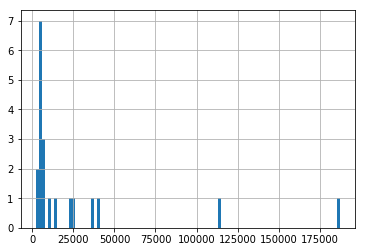

In [172]:
df.query("(NBPAC_2011==4)&(ZGLOM_2014>0)").ZGLOM_2014.hist(bins = 100)

In [80]:
df.Counterfactual_MTR_2014.mean()

0.20691601501765042

In [81]:
df.query('Between_1_X_1_child').MTR_2014.value_counts()

0.30    1385
0.14     374
0.28      17
0.00      15
0.21       1
Name: MTR_2014, dtype: int64

In [82]:
#TODO: put in stat des
for child in range(1,6):
    print(df.query('Between_{}_X_{}_child'.format(child,child)).MTR_2011.value_counts())

0.14    1792
Name: MTR_2011, dtype: int64
0.14    7420
Name: MTR_2011, dtype: int64
0.14    2770
Name: MTR_2011, dtype: int64
0.14    379
Name: MTR_2011, dtype: int64
0.14    45
Name: MTR_2011, dtype: int64


In [83]:
#TODO: put in stat des
for child in range(1,6):
    print(df.query('Over_{}_X_{}_child'.format(child,child)).MTR_2011.value_counts())

0.300    5541
0.410     310
0.140       6
0.191       2
0.147       1
Name: MTR_2011, dtype: int64
0.300    11517
0.410     1084
0.140       84
0.227        1
0.155        1
0.270        1
Name: MTR_2011, dtype: int64
0.300    2143
0.410     609
0.140       2
0.199       1
Name: MTR_2011, dtype: int64
0.30    147
0.41    114
0.14      1
Name: MTR_2011, dtype: int64
0.41    14
0.30     2
Name: MTR_2011, dtype: int64


In [84]:
## eNTRE 6350 ET 73516
df.query('Between_2_X_2_child')[df.query('Between_2_X_2_child').MTR_2014 == 0.140]["Rbg_2011"].describe()[["min", "max"]]

min    63535.5
max    73495.8
Name: Rbg_2011, dtype: float64

In [85]:
df.query('Between_4_X_4_child')[df.query('Between_4_X_4_child').MTR_2014 >= 0.140][["Rbg_2011", "MTR_2011", "Irpp_2011"]].MTR_2011.value_counts()

0.14    377
Name: MTR_2011, dtype: int64

In [86]:
#df_expetcted_values["RLM"] = fit.params.values

In [87]:
df_for_zimpom.query("Interactions_child1_over == 1").MTR_2014.mean()

0.29782764505117265

In [88]:
2336-1500

836

In [89]:
df_for_zimpom.query("Interactions_rbg_child1_over").MTR_2014.mean()

C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\pandas\core\frame.py:2300: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  new_data = self.loc[res]


0.14005959212480326

In [90]:
df["Real_MTR_from_Zimpom"] = (df.ZIMPOM_DECL_2014 - df.ZIMPOM_2011)/(df.Rbg_2014 - df.Rbg_2011)

Text(0.5,0,'MTR')

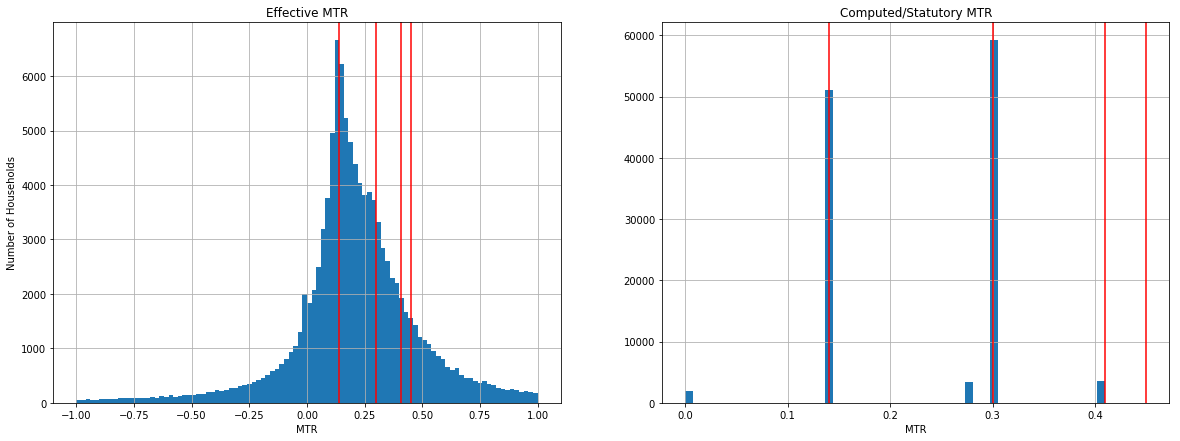

In [137]:
plt.figure(figsize = (20,7))
plt.subplot(1,2,1)
df.query("(-1<Real_MTR_from_Zimpom<1)").Real_MTR_from_Zimpom.hist(bins = 100)
y_min, y_max = plt.ylim()
plt.axvline(0.3,  color = 'r',)
plt.axvline(0.14, color = 'r',)
plt.axvline(0.41, color = 'r',)
plt.axvline(0.45, color = 'r',)
plt.ylabel("Number of Households")
plt.xlabel("MTR")
plt.title("Effective MTR")
plt.subplot(1,2,2)
plt.title("Computed/Statutory MTR")
df.MTR_2014.hist(bins = 51)
plt.axvline(0.3,  color = 'r',)
plt.axvline(0.14, color = 'r',)
plt.axvline(0.41, color = 'r',)
plt.axvline(0.45, color = 'r',)
plt.xlabel("MTR")

In [138]:
import matplotlib as mpl


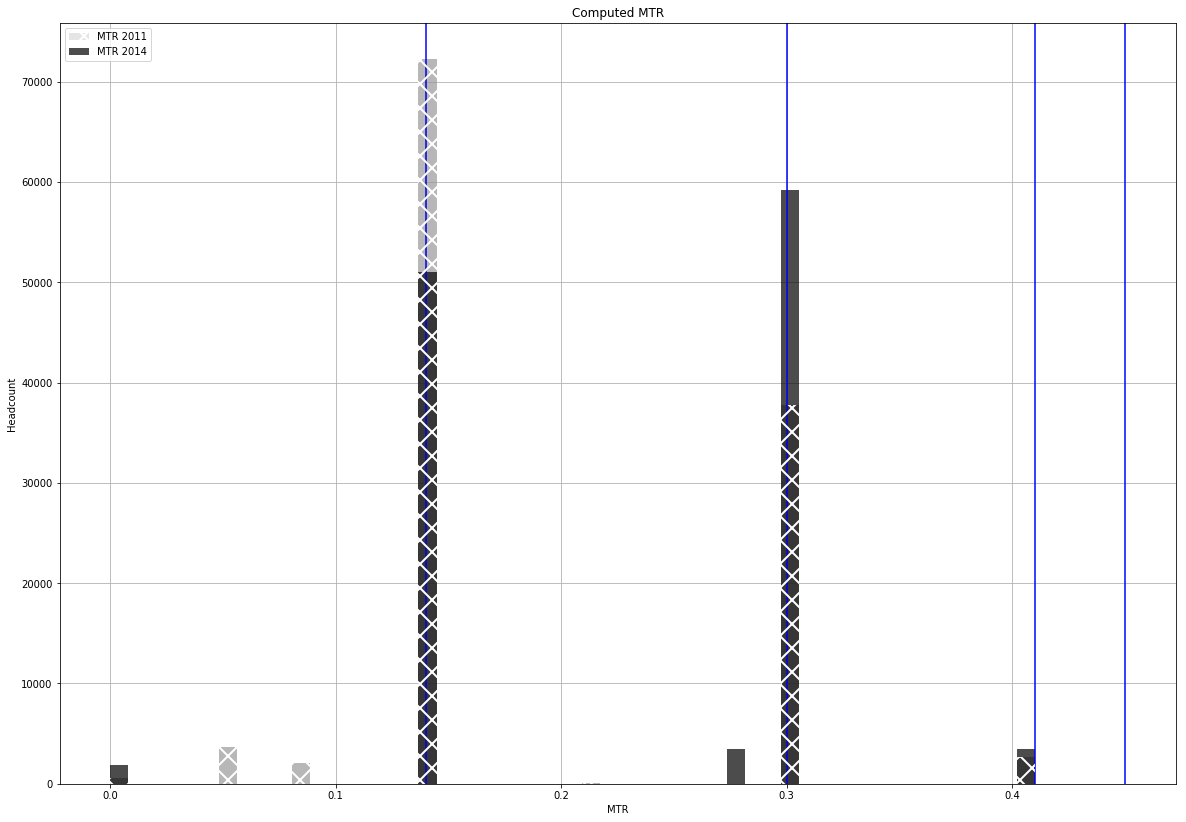

In [141]:
#Transformer en barplot plutpot qu'en hist
import matplotlib as mpl
import matplotlib.patches as mpatches

mpl.rcParams["hatch.color"] = "white"
mpl.rcParams['hatch.linewidth'] = 2

fig,ax = plt.subplots(figsize = (20,14))

plt.title("Computed MTR")
df.MTR_2011.hist(bins = 51, color = (0,0,0,0), alpha=0.1, zorder = 3,hatch = "x", label = "MTR 2011")
df.MTR_2011.hist(bins = 51, color = "k", alpha=0.2, zorder = 1, )

plt.axvline(0.3,  color = 'blue',)
plt.axvline(0.14, color = 'blue',)
plt.axvline(0.41, color = 'blue',)
plt.axvline(0.45, color = 'blue',)

plt.title("Computed MTR")
df.MTR_2014.hist(bins = 51, color = "k", alpha=0.7, zorder = 2, label = "MTR 2014")

#ax.set_xticks([0, 0.055, 0.14, 0.28, 0.3, 0.41])
plt.xlabel("MTR")
plt.ylabel("Headcount")
plt.legend()


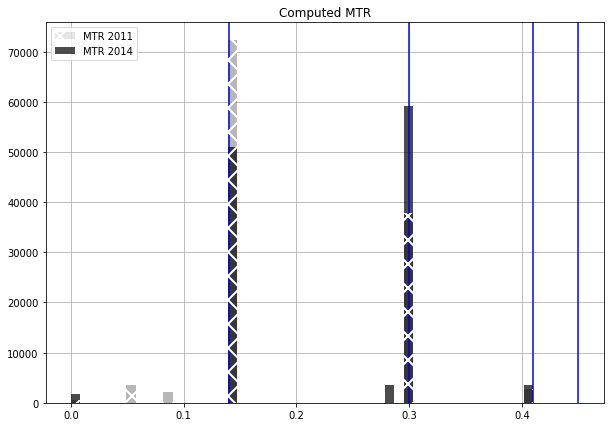

In [96]:
import matplotlib as mpl
import matplotlib.patches as mpatches

mpl.rcParams["hatch.color"] = "white"
mpl.rcParams['hatch.linewidth'] = 2

plt.figure(figsize = (10,7))

plt.title("Computed MTR")
df.MTR_2011.hist(bins = 50, color = (0,0,0,0), alpha=0.1, zorder = 3,hatch = "x", align = "mid", label = "MTR 2011")
df.MTR_2011.hist(bins = 50, color = "k", alpha=0.2, zorder = 1, align = "mid" )

plt.axvline(0.3,  color = 'blue',)
plt.axvline(0.14, color = 'blue',)
plt.axvline(0.41, color = 'blue',)
plt.axvline(0.45, color = 'blue',)

plt.title("Computed MTR")
df.MTR_2014.hist(bins = 50, color = "k", alpha=0.7, zorder = 2, align = "mid", label = "MTR 2014")



plt.legend()


In [97]:
#df.MTR_2011.plot.bar()

In [98]:
# import matplotlib as mpl
# import matplotlib.patches as mpatches

# mpl.rcParams["hatch.color"] = "white"
# mpl.rcParams['hatch.linewidth'] = 2

# plt.figure(figsize = (10,7))

# plt.title("Computed MTR")
# plt.plot((df.MTR_2011, df.MTR_2014))

# plt.legend()


In [99]:
df.MTR_2011.value_counts()

0.140    72249
0.300    37752
0.055     3628
0.410     2681
0.083     1172
0.082      951
0.000      547
0.210       45
Name: MTR_2011, dtype: int64

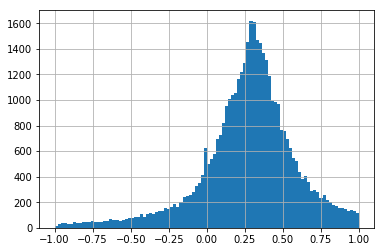

In [100]:
hist = df.query("(-1<Real_MTR_from_Zimpom<1)&(Over_threshold_1_child)").Real_MTR_from_Zimpom.hist(bins = 100)

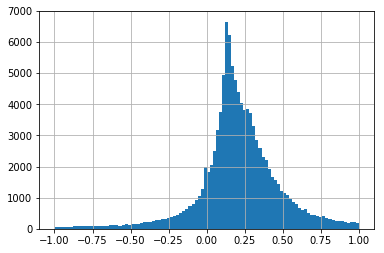

In [101]:
hist = df.query("(-1<Real_MTR_from_Zimpom<1)").Real_MTR_from_Zimpom.hist(bins = 100)

In [102]:
len( ir_2014.ir_avec_plafond_qf_enfant(df.Rbg_2014, df.Parts_fiscales_enfants))

119057

In [103]:
df["ZTSAM_10_percent_2014"] =  df["ZTSAM_2014"]*0.9


df["Irpp_2014"] = np.maximum(0, ir_2014.ir_avec_plafond_qf_enfant(df.Rbg_2014, df.Parts_fiscales_enfants) - ir_2014.decote_ir(df.Rbg_2014, df.Parts_fiscales_enfants))
df["Irpp_2014_plus_10_euros"] = np.maximum(0, ir_2014.ir_avec_plafond_qf_enfant(df.Rbg_2014+10, df.Parts_fiscales_enfants) - ir_2014.decote_ir(df.Rbg_2014+10, df.Parts_fiscales_enfants))

df["Counterfactual_Irpp_2014"] = ir_2011.ir_avec_plafond_qf_enfant(df.Rbg_2014, df.Parts_fiscales_enfants)
df["Counterfactual_Irpp_2014_plus_10_euros"] = ir_2011.ir_avec_plafond_qf_enfant(df.Rbg_2014+10, df.Parts_fiscales_enfants)

df["Irpp_2011"] = ir_2011.ir_avec_plafond_qf_enfant(df.Rbg_2011, df.Parts_fiscales_enfants)
df["Irpp_2011_plus_10_euros"] = ir_2011.ir_avec_plafond_qf_enfant(df.Rbg_2011+10, df.Parts_fiscales_enfants)



df["Counterfactual_Irpp_2011"] = ir_2014.ir_avec_plafond_qf_enfant(df.Rbg_2011, df.Parts_fiscales_enfants)
df["Counterfactual_Irpp_2011_plus_10_euros"] =  np.maximum(0, ir_2011.ir_avec_plafond_qf_enfant(df.Rbg_2011, df.Parts_fiscales_enfants) - ir_2011.decote_ir(df.Rbg_2011, df.Parts_fiscales_enfants))

df["MTR_2014"] = np.round((df.Irpp_2014_plus_10_euros - df.Irpp_2014)/10,3)
df["MTR_2011"] = np.round((df.Irpp_2011_plus_10_euros - df.Irpp_2011)/10,3)

df["Counterfactual_MTR_2014"
                     ] =  np.maximum(0, ir_2014.ir_avec_plafond_qf_enfant(df.Rbg_2011+10, df.Parts_fiscales_enfants) - ir_2014.decote_ir(df.Rbg_2011+10, df.Parts_fiscales_enfants))

df["Counterfactual_MTR_2011"
                     ] = np.round((df.Counterfactual_Irpp_2011_plus_10_euros - df.Counterfactual_Irpp_2011)/10,2)


In [104]:
df["ZTSAM_10_percent_2014"] =  df["ZTSAM_2014"]*0.9


df["Irpp_2014"] = np.maximum(0, ir_2014.ir_avec_plafond_qf_enfant(df.Rbg_2014, df.Parts_fiscales_enfants) - ir_2014.decote_ir(df.Rbg_2014, df.Parts_fiscales_enfants))
df["Irpp_2014_plus_10_euros"] = np.maximum(0, ir_2014.ir_avec_plafond_qf_enfant(df.Rbg_2014+10, df.Parts_fiscales_enfants) - ir_2014.decote_ir(df.Rbg_2014+10, df.Parts_fiscales_enfants))

df["Counterfactual_Irpp_2014"] = np.maximum(0, ir_2011.ir_avec_plafond_qf_enfant(df.Rbg_2014, df.Parts_fiscales_enfants) - ir_2011.decote_ir(df.Rbg_2014, df.Parts_fiscales_enfants))
df["Counterfactual_Irpp_2014_plus_10_euros"] =  np.maximum(0, ir_2011.ir_avec_plafond_qf_enfant(df.Rbg_2014+10, df.Parts_fiscales_enfants) - ir_2011.decote_ir(df.Rbg_2014+10, df.Parts_fiscales_enfants))

df["Irpp_2011"] = np.maximum(0, ir_2011.ir_avec_plafond_qf_enfant(df.Rbg_2011, df.Parts_fiscales_enfants) - ir_2011.decote_ir(df.Rbg_2011, df.Parts_fiscales_enfants))
df["Irpp_2011_plus_10_euros"] = np.maximum(0, ir_2011.ir_avec_plafond_qf_enfant(df.Rbg_2011+10, df.Parts_fiscales_enfants) - ir_2011.decote_ir(df.Rbg_2011+10, df.Parts_fiscales_enfants))



df["Counterfactual_Irpp_2011"] = np.maximum(0, ir_2014.ir_avec_plafond_qf_enfant(df.Rbg_2011, df.Parts_fiscales_enfants) - ir_2014.decote_ir(df.Rbg_2011, df.Parts_fiscales_enfants))
df["Counterfactual_Irpp_2011_plus_10_euros"] =  np.maximum(0, ir_2014.ir_avec_plafond_qf_enfant(df.Rbg_2011+10, df.Parts_fiscales_enfants) - ir_2014.decote_ir(df.Rbg_2011+10, df.Parts_fiscales_enfants))

df["MTR_2014"] = np.round((df.Irpp_2014_plus_10_euros - df.Irpp_2014)/10,3)
df["MTR_2011"] = np.round((df.Irpp_2011_plus_10_euros - df.Irpp_2011)/10,3)

df["Counterfactual_MTR_2014"
                     ] =  np.round((df.Counterfactual_Irpp_2014_plus_10_euros - df.Counterfactual_Irpp_2014)/10,2)

df["Counterfactual_MTR_2011"
                     ] = np.round((df.Counterfactual_Irpp_2011_plus_10_euros - df.Counterfactual_Irpp_2011)/10,2)


In [105]:
df.Counterfactual_MTR_2014.value_counts()

0.14    68359
0.30    44664
0.41     3721
0.05      943
0.08      628
0.06      456
0.00      216
0.21       43
0.23        4
0.24        4
Name: Counterfactual_MTR_2014, dtype: int64

Should all be at 30% or more...

In [106]:
df.query("Between_2_X_2_child")[df.query("Between_2_X_2_child").Counterfactual_MTR_2011 == 0.14]["Rbg_2011"].describe()

count      363.000000
mean     63719.643251
std        113.581945
min      63530.100000
25%      63622.100000
50%      63720.000000
75%      63820.950000
max      63913.000000
Name: Rbg_2011, dtype: float64

In [108]:
df.Counterfactual_Irpp_2011_plus_10_euros- df.Counterfactual_Irpp_2011

0         0.0
2         1.4
9         3.0
29        1.4
33        1.4
51        1.4
53        0.0
55        1.4
56        3.0
59        4.1
69        1.4
72        3.0
77        1.4
95        3.0
98        3.0
100       3.0
108       3.0
113       3.0
124       1.4
126       3.0
132       3.0
133       3.0
134       2.8
147       3.0
149       1.4
168       3.0
171       2.8
172       3.0
174       3.0
186       1.4
         ... 
789559    3.0
789566    1.4
789569    1.4
789576    3.0
789587    3.0
789589    4.1
789591    3.0
789595    1.4
789597    3.0
789606    3.0
789615    3.0
789620    1.4
789623    3.0
789630    1.4
789632    1.4
789634    1.4
789636    1.4
789638    1.4
789640    3.0
789660    3.0
789669    1.4
789675    3.0
789688    3.0
789689    1.4
789700    1.4
789705    1.4
789707    1.4
789708    1.4
789712    1.4
789727    3.0
Length: 119057, dtype: float64

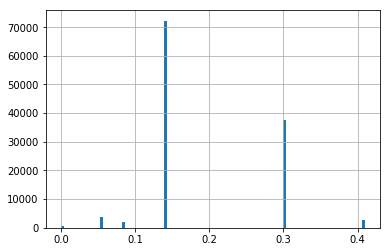

In [109]:
df.MTR_2011.hist(bins = 100)

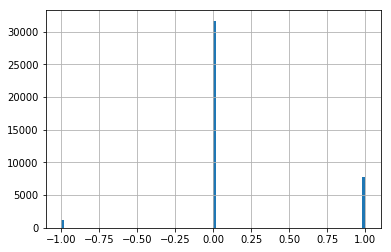

In [110]:
hist = df.query("(-1<Real_MTR_from_Zimpom<1)&(Over_threshold_1_child)").Real_MTR_from_Zimpom.apply(np.round, 6).hist(bins = 100)

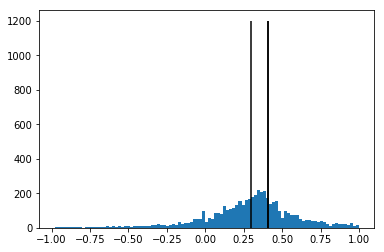

In [111]:
plt.hist(np.round(df.query("(-1<Real_MTR_from_Zimpom<1)&(Over_threshold)&(NBPAC_2011 == 1)").Real_MTR_from_Zimpom, 2), bins = 101)
# plt.xlim(0,0.5)
plt.vlines(0.3,0,1200)
plt.vlines(0.41,0,1200)
plt.vlines(0.41,0,1200)


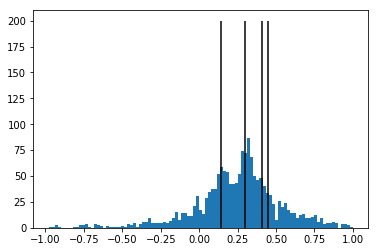

In [112]:
plt.hist(np.round(df.query("(-1<Real_MTR_from_Zimpom<1)&(Between_thresholds)&(NBPAC_2011 == 1)").Real_MTR_from_Zimpom, 2), bins = 101)
# plt.xlim(0,0.5)
plt.vlines(0.3,0,200)
plt.vlines(0.14,0,200)
plt.vlines(0.41,0,200)
plt.vlines(0.45,0,200)

In [113]:
interactions_rbg_between = ["Interactions_rbg_child{}_between".format(child) for child in range(1,6)]
interactions_rbg_over = ["Interactions_rbg_child{}_over".format(child) for child in range(1,6)]
interactions_child_over = ["Interactions_child{}_over".format(child) for child in range(1,6)]

df_for_zimpom =  df.query("((200000>Rbg_2011>50000)&(200000>Rbg_2014>50000))"+
                              "&(NBPAC_2011 == NBPAC_2014)&(@no_attached) ")
regression_delta_zimpom_formula = "(Delta_ZIMPOM)~   {} - 1 + Not_touched_by_reform + Delta_Rbg_times_not_touched_reform".format(
        ' + '.join( interactions_rbg_over+interactions_rbg_between))
m = sm.RLM.from_formula(regression_delta_zimpom_formula
                    ,df_for_zimpom)#SAME NBPAC
fit = m.fit()
summary = fit.summary(); print(summary)

C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\pandas\core\frame.py:2366: PerformanceWarning: Alignment difference on axis 0 is larger than an order of magnitude on term 'Rbg_2011', by more than 4.901; performance may suffer
  return _eval(expr, inplace=inplace, **kwargs)
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\pandas\core\frame.py:2366: PerformanceWarning: Alignment difference on axis 0 is larger than an order of magnitude on term 'Rbg_2014', by more than 4.901; performance may suffer
  return _eval(expr, inplace=inplace, **kwargs)
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\pandas\core\frame.py:2366: PerformanceWarning: Alignment difference on axis 0 is larger than an order of magnitude on term 'NBPAC_2011', by more than 4.901; performance may suffer
  return _eval(expr, inplace=inplace, **kwargs)
C:\Users\IMPTEMP_A_PACI

                    Robust linear Model Regression Results                    
Dep. Variable:           Delta_ZIMPOM   No. Observations:                83003
Model:                            RLM   Df Residuals:                    82991
Method:                          IRLS   Df Model:                           11
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Tue, 19 Feb 2019                                         
Time:                        16:31:24                                         
No. Iterations:                    26                                         
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [114]:
(df_for_zimpom["Interactions_rbg_child1_between"] * 0.3).shape

(83003,)

In [123]:

df_for_zimpom.query("Over_1_X_1_child").Zimpom_corrected.mean()
df_for_zimpom.query("Over_2_X_2_child").Zimpom_corrected.mean()

1808.5110268830138

In [124]:
np.array([1,2,4,6,8])*836

array([ 836, 1672, 3344, 5016, 6688])

In [125]:
for child in range(1,6):
    print(df_for_zimpom.query("Over_{}_X_{}_child".format(child,child)).Zimpom_corrected.mean())

967.4358517601247
1808.5110268830138
3776.522391799547
5173.744471544718
16470.6


In [126]:
df_for_zimpom.query("Over_2_X_2_child").Zimpom_corrected.mean()

1808.5110268830138

In [202]:
df["Zimpom_corrected_between"] = df.Delta_ZIMPOM
for child in range(1,6):
    df.loc[(df["Over_{}_X_{}_child".format(child,child)]==True), "Zimpom_corrected_between"] = df.Delta_ZIMPOM - df["Interactions_rbg_child{}_over".format(child)] * 0.3


In [186]:
df_for_zimpom.Zimpom_corrected_over.fillna(0, inplace = True)

C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\pandas\core\generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [193]:
df["Zimpom_corrected_over"] = df.Delta_ZIMPOM
for child in range(1,6):
    df.loc[(df["Over_{}_X_{}_child".format(child,child)]==True), "Zimpom_corrected_over"] = df.Delta_ZIMPOM - (836 * child + (child>2)*836)

In [236]:
interactions_rbg_between = ["Interactions_rbg_child{}_between".format(child) for child in range(1,6)]
interactions_rbg_over = ["Interactions_rbg_child{}_over".format(child) for child in range(1,6)]
interactions_child_over = ["Interactions_child{}_over".format(child) for child in range(1,6)]

df_for_zimpom =  df.query("((200000>Rbg_2011>50000)&(200000>Rbg_2014>50000))"+
                              "&(NBPAC_2011 == NBPAC_2014)&(@no_attached) ")
regression_delta_zimpom_formula = "Zimpom_corrected_over ~  {} - 1 + Not_touched_by_reform+ Delta_Rbg_times_not_touched_reform".format(
        ' + '.join( interactions_child_over+interactions_rbg_over+interactions_rbg_between))
m = sm.RLM.from_formula(regression_delta_zimpom_formula
                    ,df_for_zimpom)#SAME NBPAC
fit = m.fit()
summary = fit.summary(); print(summary)

C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\pandas\core\frame.py:2366: PerformanceWarning: Alignment difference on axis 0 is larger than an order of magnitude on term 'Rbg_2011', by more than 4.897; performance may suffer
  return _eval(expr, inplace=inplace, **kwargs)
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\pandas\core\frame.py:2366: PerformanceWarning: Alignment difference on axis 0 is larger than an order of magnitude on term 'Rbg_2014', by more than 4.897; performance may suffer
  return _eval(expr, inplace=inplace, **kwargs)
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\pandas\core\frame.py:2366: PerformanceWarning: Alignment difference on axis 0 is larger than an order of magnitude on term 'NBPAC_2011', by more than 4.897; performance may suffer
  return _eval(expr, inplace=inplace, **kwargs)
C:\Users\IMPTEMP_A_PACI

                      Robust linear Model Regression Results                     
Dep. Variable:     Zimpom_corrected_over   No. Observations:                25526
Model:                               RLM   Df Residuals:                    25510
Method:                             IRLS   Df Model:                           15
Norm:                             HuberT                                         
Scale Est.:                          mad                                         
Cov Type:                             H1                                         
Date:                   Wed, 20 Feb 2019                                         
Time:                           12:13:20                                         
No. Iterations:                       15                                         
                                         coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------

In [234]:
interactions_rbg_between = ["Interactions_rbg_child{}_between".format(child) for child in range(1,6)]
interactions_rbg_over = ["Interactions_rbg_child{}_over".format(child) for child in range(1,6)]
interactions_child_over = ["Interactions_child{}_over".format(child) for child in range(1,6)]

df_for_zimpom =  df.query("((200000>Rbg_2011>50000)&(200000>Rbg_2014>50000))"+
                              "&(NBPAC_2011 == NBPAC_2014)&(@no_attached) ")
df_for_zimpom = df_for_zimpom.loc[df_for_zimpom[["ZAVFM_2014", "ZAVFM_DECL_2014", "GARDEM_2014", "SERVDOMM_2014"]].sum(axis = 1)==0]
regression_delta_zimpom_formula = "Zimpom_corrected_over ~  {} - 1 + Not_touched_by_reform+ Delta_Rbg_times_not_touched_reform".format(
        ' + '.join( interactions_child_over+interactions_rbg_over+interactions_rbg_between))
m = sm.RLM.from_formula(regression_delta_zimpom_formula
                    ,df_for_zimpom)#SAME NBPAC
fit = m.fit()
summary = fit.summary(); print(summary)

C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\pandas\core\frame.py:2366: PerformanceWarning: Alignment difference on axis 0 is larger than an order of magnitude on term 'Rbg_2011', by more than 4.897; performance may suffer
  return _eval(expr, inplace=inplace, **kwargs)
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\pandas\core\frame.py:2366: PerformanceWarning: Alignment difference on axis 0 is larger than an order of magnitude on term 'Rbg_2014', by more than 4.897; performance may suffer
  return _eval(expr, inplace=inplace, **kwargs)
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\pandas\core\frame.py:2366: PerformanceWarning: Alignment difference on axis 0 is larger than an order of magnitude on term 'NBPAC_2011', by more than 4.897; performance may suffer
  return _eval(expr, inplace=inplace, **kwargs)
C:\Users\IMPTEMP_A_PACI

                      Robust linear Model Regression Results                     
Dep. Variable:     Zimpom_corrected_over   No. Observations:                12475
Model:                               RLM   Df Residuals:                    12460
Method:                             IRLS   Df Model:                           14
Norm:                             HuberT                                         
Scale Est.:                          mad                                         
Cov Type:                             H1                                         
Date:                   Wed, 20 Feb 2019                                         
Time:                           12:11:40                                         
No. Iterations:                       12                                         
                                         coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------

In [ ]:
df[["ZAVFM_2014", "ZAVFM_DECL_2014", "GARDEM_2014", "SERVDOMM_2014", "ZAVFM_2011", "ZAVFM_DECL_2011", "GARDEM_2011", "SERVDOMM_2011"]]

In [ ]:
df.ZA

In [ ]:
df[["ZAVFM_2014", "ZAVFM_DECL_2014", "GARDEM_2014", "SERVDOMM_2014"]]

In [224]:
interactions_rbg_between = ["Interactions_rbg_child{}_between".format(child) for child in range(1,6)]
interactions_rbg_over = ["Interactions_rbg_child{}_over".format(child) for child in range(1,6)]
interactions_child_over = ["Interactions_child{}_over".format(child) for child in range(1,6)]

df_for_zimpom =  df.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))"+
                              "&(NBPAC_2011 == NBPAC_2014)&(@no_attached) ")
regression_delta_zimpom_formula = "Delta_ZIMPOM ~  {} - 1 + C(NBPAC_2011)+ Delta_Rbg_times_not_touched_reform:C(NBPAC_2011)".format(
        ' + '.join( interactions_child_over+interactions_rbg_over+interactions_rbg_between))
m = sm.RLM.from_formula(regression_delta_zimpom_formula
                    ,df_for_zimpom)#SAME NBPAC
fit = m.fit()
summary = fit.summary(); print(summary)

C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\pandas\core\frame.py:2366: PerformanceWarning: Alignment difference on axis 0 is larger than an order of magnitude on term 'Rbg_2011', by more than 4.897; performance may suffer
  return _eval(expr, inplace=inplace, **kwargs)
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\pandas\core\frame.py:2366: PerformanceWarning: Alignment difference on axis 0 is larger than an order of magnitude on term 'Rbg_2014', by more than 4.897; performance may suffer
  return _eval(expr, inplace=inplace, **kwargs)
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\pandas\core\frame.py:2366: PerformanceWarning: Alignment difference on axis 0 is larger than an order of magnitude on term 'NBPAC_2011', by more than 4.897; performance may suffer
  return _eval(expr, inplace=inplace, **kwargs)
C:\Users\IMPTEMP_A_PACI

                    Robust linear Model Regression Results                    
Dep. Variable:           Delta_ZIMPOM   No. Observations:                40117
Model:                            RLM   Df Residuals:                    40090
Method:                          IRLS   Df Model:                           26
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 20 Feb 2019                                         
Time:                        12:05:30                                         
No. Iterations:                    15                                         
                                                            coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [199]:
interactions_rbg_between = ["Interactions_rbg_child{}_between".format(child) for child in range(1,6)]
interactions_rbg_over = ["Interactions_rbg_child{}_over".format(child) for child in range(1,6)]
interactions_child_over = ["Interactions_child{}_over".format(child) for child in range(1,6)]

df_for_zimpom =  df.query("((200000>Rbg_2011>50000)&(200000>Rbg_2014>50000))"+
                              "&(NBPAC_2011 == NBPAC_2014)|(@no_attached) ")
regression_delta_zimpom_formula = "Zimpom_corrected_over ~  {} - 1 + Not_touched_by_reform+ Delta_Rbg_times_not_touched_reform".format(
        ' + '.join(interactions_rbg_over+interactions_rbg_between))
m = sm.RLM.from_formula(regression_delta_zimpom_formula
                    ,df_for_zimpom)#SAME NBPAC
fit = m.fit()
summary = fit.summary(); print(summary)

C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\pandas\core\frame.py:2366: PerformanceWarning: Alignment difference on axis 0 is larger than an order of magnitude on term 'Rbg_2011', by more than 4.897; performance may suffer
  return _eval(expr, inplace=inplace, **kwargs)
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\pandas\core\frame.py:2366: PerformanceWarning: Alignment difference on axis 0 is larger than an order of magnitude on term 'Rbg_2014', by more than 4.897; performance may suffer
  return _eval(expr, inplace=inplace, **kwargs)
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\pandas\core\frame.py:2366: PerformanceWarning: Alignment difference on axis 0 is larger than an order of magnitude on term 'NBPAC_2011', by more than 4.897; performance may suffer
  return _eval(expr, inplace=inplace, **kwargs)
C:\Users\IMPTEMP_A_PACI

                      Robust linear Model Regression Results                     
Dep. Variable:     Zimpom_corrected_over   No. Observations:                40117
Model:                               RLM   Df Residuals:                    40105
Method:                             IRLS   Df Model:                           11
Norm:                             HuberT                                         
Scale Est.:                          mad                                         
Cov Type:                             H1                                         
Date:                   Wed, 20 Feb 2019                                         
Time:                           09:16:40                                         
No. Iterations:                       14                                         
                                         coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------

In [214]:
interactions_rbg_between = ["Interactions_rbg_child{}_between".format(child) for child in range(1,6)]
interactions_rbg_over = ["Interactions_rbg_child{}_over".format(child) for child in range(1,6)]
interactions_child_over = ["Interactions_child{}_over".format(child) for child in range(1,6)]

df_for_zimpom =  df.query("((200000>Rbg_2011>50000)&(200000>Rbg_2014>50000))"+
                              "&(NBPAC_2011 == NBPAC_2014)&(@no_attached) ")
regression_delta_zimpom_formula = "Zimpom_corrected_between ~  {} - 1 + Not_touched_by_reform+ Delta_Rbg_times_not_touched_reform".format(
        ' + '.join( interactions_child_over+interactions_rbg_between))
m = sm.RLM.from_formula(regression_delta_zimpom_formula
                    ,df_for_zimpom)#SAME NBPAC
fit = m.fit()
summary = fit.summary(); print(summary)

C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\pandas\core\frame.py:2366: PerformanceWarning: Alignment difference on axis 0 is larger than an order of magnitude on term 'Rbg_2011', by more than 4.897; performance may suffer
  return _eval(expr, inplace=inplace, **kwargs)
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\pandas\core\frame.py:2366: PerformanceWarning: Alignment difference on axis 0 is larger than an order of magnitude on term 'Rbg_2014', by more than 4.897; performance may suffer
  return _eval(expr, inplace=inplace, **kwargs)
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\pandas\core\frame.py:2366: PerformanceWarning: Alignment difference on axis 0 is larger than an order of magnitude on term 'NBPAC_2011', by more than 4.897; performance may suffer
  return _eval(expr, inplace=inplace, **kwargs)
C:\Users\IMPTEMP_A_PACI

                       Robust linear Model Regression Results                       
Dep. Variable:     Zimpom_corrected_between   No. Observations:                25526
Model:                                  RLM   Df Residuals:                    25509
Method:                                IRLS   Df Model:                           16
Norm:                                HuberT                                         
Scale Est.:                             mad                                         
Cov Type:                                H1                                         
Date:                      Wed, 20 Feb 2019                                         
Time:                              11:59:41                                         
No. Iterations:                          13                                         
                                         coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------

In [ ]:
df.loc[:, ["Between_{}_X_{}_child".format(child, child) for child in range(1,6)]] = df[["Between_{}_X_{}_child".format(child, child) for child in range(1,6)]].astype("int")
interactions_rbg_between = ["Interactions_rbg_child{}_between".format(child) for child in range(1,6)]
interactions_rbg_over = ["Interactions_rbg_child{}_over".format(child) for child in range(1,6)]
interactions_child_over = ["Interactions_child{}_over".format(child) for child in range(1,6)]

df_for_zimpom =  df.query("((200000>Rbg_2011>50000)&(200000>Rbg_2014>50000))"+
                              "&(NBPAC_2011 == NBPAC_2014)&(@no_attached) ")
regression_delta_zimpom_formula = "Delta_ZIMPOM ~  {} - 1+  + C(NBPAC_2011)+ Delta_Rbg_times_not_touched_reform:C(NBPAC_2011)".format(
        ' + '.join( interactions_child_over+interactions_rbg_over+interactions_rbg_between+
                  ["Between_{}_X_{}_child".format(child, child) for child in range(1,6)]))
m = sm.RLM.from_formula(regression_delta_zimpom_formula
                    ,df_for_zimpom)#SAME NBPAC
fit = m.fit()
summary = fit.summary(); print(summary)

In [213]:
836*6

5016

In [ ]:
df.Zimpom_corrected_over.value_counts(dropna = False)

In [128]:
df_for_zimpom.loc[(df["Over_1_X_1_child"]==True), "Zimpom_corrected"] = df_for_zimpom.Delta_ZIMPOM - df_for_zimpom["Interactions_rbg_child1_over"] * 0.3 #+ df_for_zimpom["Interactions_rbg_child1_over"] * 0.3
df_for_zimpom.loc[(df["Over_2_X_2_child"]==True), "Zimpom_corrected"] = df_for_zimpom.Delta_ZIMPOM - df_for_zimpom["Interactions_rbg_child2_over"] * 0.3 #+ df_for_zimpom["Interactions_rbg_child1_over"] * 0.3
df_for_zimpom.loc[(df["Between_2_X_2_child"]==True), "Zimpom_corrected"] = df_for_zimpom.Delta_ZIMPOM - df_for_zimpom["Interactions_rbg_child2_between"] * 0.3

C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [132]:
for child in range(1,6):
    df_for_zimpom.loc[(df["Over_{}_X_{}_child".format(child,child)]==True), "Zimpom_corrected"] = df_for_zimpom.Delta_ZIMPOM - df_for_zimpom.MTR_2011 #+ df_for_zimpom["Interactions_rbg_child1_over"] * 0.3


C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [129]:
np.array([1,2,4,6,8])*836

array([ 836, 1672, 3344, 5016, 6688])

In [131]:
no_attached = (df.TYPE_FISC_2014.str.count("[3-9]")<1)&(df.TYPE_FISC_2011.str.count("[3-9]")<1)
m = sm.OLS.from_formula("(Delta_rbg)~   {} ".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                    , df.query("((200000>Rbg_2011>50000)&(200000>Rbg_2014>50000))"+
                              "&(NBPAC_2011 == NBPAC_2014)&(@no_attached) ")) #SAME NBPAC
fit = m.fit()
summary = fit.summary(); print(summary)

                            OLS Regression Results                            
Dep. Variable:              Delta_rbg   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     118.7
Date:                Tue, 19 Feb 2019   Prob (F-statistic):               0.00
Time:                        16:38:17   Log-Likelihood:            -8.9606e+05
No. Observations:               83003   AIC:                         1.792e+06
Df Residuals:                   82977   BIC:                         1.792e+06
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

# With dependent children

In [ ]:
no_attached = (df.TYPE_FISC_2014.str.count("[3-9]")<1)&(df.TYPE_FISC_2011.str.count("[3-9]")<1)
m = sm.OLS.from_formula("(Delta_rbg)~   {} ".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                    , df.query("((200000>Rbg_2011>50000)&(200000>Rbg_2014>50000))"+
                              "&(NBPAC_2011 == NBPAC_2014) ")) #SAME NBPAC
fit = m.fit()
summary = fit.summary(); print(summary)


# Child(ren) has(ve) left the household

In [ ]:

m = sm.OLS.from_formula("(Delta_rbg)~   {} ".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                    , df.query("((200000>Rbg_2011>50000)&(200000>Rbg_2014>50000))"+
                              "&(NBPAC_2011 > NBPAC_2014) ")) #SAME NBPAC
fit = m.fit()
summary = fit.summary(); print(summary)


In [ ]:
for child in range(0,7):
    df["child_{}_2014".format(child)] = df.NBPAC_2014 == child
between_threshold_for_child_rank = ["Between_threshold_{}_child".format(nb_child) for nb_child in range(1,nb_enf_max_for_annalysis+1)]
over_threshold_for_child_rank = ["Over_threshold_{}_child".format(nb_child) for nb_child in range(1,nb_enf_max_for_annalysis+1)]
children_number_2014 =  ["child_{}_2014".format(nb_child) for nb_child in range(1,nb_enf_max_for_annalysis+1)]

interaction_child_between_threshold_2014  = ["{}_2014:{}".format(child,interaction) for child, interaction in zip(children_number, between_threshold_for_child_rank)]
interaction_child_over_threshold_2014  = ["{}_2014:{}".format(child,interaction) for child, interaction in zip(children_number, over_threshold_for_child_rank)]

In [ ]:
hardcoded_over_2014 = ["Over_{}_X_{}_child_2014".format(child,child) for child in range(1,nb_enf_max_for_annalysis+1)]
hardcoded_between_2014 = ["Between_{}_X_{}_child_2014".format(child,child) for child in range(1,nb_enf_max_for_annalysis+1)]

In [ ]:
## Interactions hardcoded
for child in range(1,7):
    df["Over_{}_X_{}_child_2014".format(child,child)] = df["Over_threshold_{}_child".format(child)] * (df["NBPAC_2014"]==child)
    df["Between_{}_X_{}_child_2014".format(child,child)] = df["Between_threshold_{}_child".format(child)] * (df["NBPAC_2014"]==child)

In [ ]:
no_attached = (df.TYPE_FISC_2014.str.count("[3-9]")<1)&(df.TYPE_FISC_2011.str.count("[3-9]")<1)
m = sm.OLS.from_formula("(Delta_rbg)~   {} ".format(
        ' + '.join(children_number #below_threshold_for_child_rank+interaction_child_below_thresholds
                  +hardcoded_over_2014+hardcoded_between_2014+over_threshold_for_child_rank+between_threshold_for_child_rank))
                    , df.query("((200000>Rbg_2011>50000)&(200000>Rbg_2014>50000))"+
                              "&(NBPAC_2011 >= NBPAC_2014) ").sample(n = 12000)) #SAME NBPAC
fit = m.fit()
summary = fit.summary(); print(summary)


In [ ]:
df.Rbg_2014.hist(bins = 900)

In [ ]:

df.Rbg_2011.hist(bins = 900)

In [ ]:
print((df.Rbg_2011 == 0).value_counts(normalize = True))
print((df.Rbg_2014 == 0).value_counts(normalize = True))

In [ ]:
range(nb_enf_max_for_annalysis+1)

In [ ]:
%%time
df = df[df.NBPAC_2011.isin(range(nb_enf_max_for_annalysis+1))]#,6,7])]
#df = df[df.AGERF_2011<50]

In [ ]:
df.shape

In [ ]:
import statsmodels.api as sm
df["Rbg_splines"]  = pd.cut(df.Rbg_2011, 10)

In [ ]:
df = df[(df.NBPAC_2011 == df.NBPAC_2014)]

### Stat Des

In [ ]:
stat_des_variables = ["Rbg_2011","Rbg_2014","Delta_rbg","Age_father", "Age_mother","NBPAC_2011" , "Age_youngest_child", "Age_eldest_child"]

In [ ]:
df[stat_des_variables].describe().loc["mean"]

In [ ]:
df[stat_des_variables].query("NBPAC_2011==1").describe().loc["mean"]

In [ ]:
df[stat_des_variables].query("NBPAC_2011==2").describe().loc["mean"]

In [ ]:
df[stat_des_variables].query("NBPAC_2011==0").describe().loc["mean"]

In [ ]:
### TODO: faire un multi-index avec all , 0 child, 1 ,2,3,4 and more child en colones et les variables en ignes.
stat_des_df = pd.DataFrame()

In [ ]:
df.Rbg_2014.hist(bins = 100, alpha = 0.5, label = "2014")
df.Rbg_2011.hist(bins = 100,alpha = 0.5, label = "2011")
plt.legend()

In [ ]:
import seaborn as sns
sns.distplot(df.Rbg_2014, color = "r")
sns.distplot(df.Rbg_2011)

In [ ]:
threshold_byr_rbg = pd.DataFrame()
threshold_byr_rbg["2011"] = pd.Series([63233,73516,94451,115185,135941,150684])
threshold_byr_rbg["2014"] = pd.Series([58291,63530,73806,84103,94368,104633])
threshold_byr_rbg.index = range(1,7); threshold_byr_rbg.index.name = 'nb_enf'
threshold_byr_rbg




df["Not_touched_by_reform"] = (df.NBPAC_2011 == 0).astype("int")
for nb_enf in range(1,7): ### in modification
    df["Not_touched_by_reform".format(nb_enf)
          ] +=((df.Rbg_2011<  threshold_byr_rbg["2014"].iloc[nb_enf-1])
                *( df.NBPAC_2011 == nb_enf)).astype("float")

In [ ]:
df["Distance_to_treatment_2"]  = 0
for child in range(1,nb_enf_max_for_annalysis+1):
    df["Distance_to_treatment_2"] += df["Over_threshold_{}_child".format(child)] * df[child_bool_list[child-1]] * ((threshold_byr_rbg["2011"].iloc[child-1]) - df.Rbg_2014)

In [ ]:
df.Not_touched_by_reform.value_counts()

In [ ]:
df_desc_stat = pd.DataFrame()

for child in  range(0, nb_enf_max_for_annalysis+1):
        df_desc_stat.loc[child, "Treatment_0"] = df.query(
                                            "NBPAC_2011=={}".format(child)
                                            )["Not_touched_by_reform".format(child)].value_counts()[True]


for child in  range(1, nb_enf_max_for_annalysis+1):
    df_desc_stat.loc[child, "Treatment_1"] = df.query(
                                            "NBPAC_2011=={}".format(child)
                                            )["Between_threshold_{}_child".format(child)].value_counts()[True]
    df_desc_stat.loc[child, "Treatment_2"] = df.query(
                                            "NBPAC_2011=={}".format(child)
                                            )["Over_threshold_{}_child".format(child)].value_counts()[True]
df_desc_stat["Total"] = df_desc_stat.sum(axis = 1)
df_desc_stat.loc["Total"] = df_desc_stat.sum(axis = 0)

In [ ]:
df_desc_stat

#### Still in the same treatment span

In [ ]:

df["Rbg2014_below_threshold_{}_child".format(0)
          ] =  True
for nb_enf in range(1,7): ### in modification
    df["Rbg2014_Over_threshold_{}_child".format(nb_enf)
          ] =  (df.Rbg_2014 > threshold_byr_rbg["2011"].iloc[nb_enf-1])
    df["Rbg2014_Between_threshold_{}_child".format(nb_enf)
          ] =  (df.Rbg_2014 > threshold_byr_rbg["2014"].iloc[nb_enf-1]) & (df.Rbg_2014 < threshold_byr_rbg["2011"].iloc[nb_enf-1])
    df["Rbg2014_below_threshold_{}_child".format(nb_enf)
          ] =  (df.Rbg_2014 < threshold_byr_rbg["2014"].iloc[nb_enf-1])



In [ ]:
df_desc_stat_2014 = pd.DataFrame()

for child in  [0]:
        df_desc_stat_2014.loc[child, "Treatment_0"] = df.query(
                                            "NBPAC_2011=={}".format(child)
                                            )["Rbg2014_below_threshold_{}_child".format(child)].value_counts()[True]



for child in  range(1, nb_enf_max_for_annalysis+1):
    df_desc_stat_2014.loc[child, "Treatment_1"] = df.query(
                                            "NBPAC_2011=={}".format(child)
                                            )["Rbg2014_Between_threshold_{}_child".format(child)].value_counts()[True]
    df_desc_stat_2014.loc[child, "Treatment_2"] = df.query(
                                            "NBPAC_2011=={}".format(child)
                                            )["Rbg2014_Over_threshold_{}_child".format(child)].value_counts()[True]
    
    df_desc_stat_2014.loc[child, "Treatment_0"] = df.query(
                                            "NBPAC_2011=={}".format(child)
                                            )["Rbg2014_below_threshold_{}_child".format(child)].value_counts()[True]
    
    
    
df_desc_stat_2014["Total"] = df_desc_stat_2014.sum(axis = 1)

In [ ]:
df_desc_stat_2014

#### Transitions 

In [ ]:
df_desc_stat = pd.DataFrame()

for child in  [0]:
    df_desc_stat.loc[child, "Treatment_0"] = df.query(
                                            "NBPAC_2011=={}".format(child)
                                            )["Rbg2014_below_threshold_{}_child".format(child)].value_counts()[True]



for child in  range(1, nb_enf_max_for_annalysis+1):
    df_desc_stat.loc[child, "Treatment_1"] = df.query(
                                            "NBPAC_2011=={}".format(child)
                                            )["Rbg2014_Between_threshold_{}_child".format(child)].value_counts()[True]
    df_desc_stat.loc[child, "Treatment_2"] = df.query(
                                            "NBPAC_2011=={}".format(child)
                                            )["Rbg2014_Over_threshold_{}_child".format(child)].value_counts()[True]
    
    df_desc_stat.loc[child, "Treatment_0"] = df.query(
                                            "NBPAC_2011=={}".format(child)
                                            )["Rbg2014_below_threshold_{}_child".format(child)].value_counts()[True]
    
    
df_desc_stat["Total"] = df_desc_stat.sum(axis = 1)

In [ ]:
df_desc_stat

In [ ]:
df_temp_transition =df

In [ ]:
df_temp_transition["Treatment_0_2014"] = False * df.shape[0]
df_temp_transition["Treatment_0_2011"] = False * df.shape[0]


df_temp_transition["Treatment_1_2014"] = False * df.shape[0]
df_temp_transition["Treatment_1_2011"] = False * df.shape[0]

df_temp_transition["Treatment_2_2014"] = False * df.shape[0]
df_temp_transition["Treatment_2_2011"] = False * df.shape[0]



for child in range(1,7):
    df_temp_transition["Treatment_1_2014"] += (df.NBPAC_2011 == child) * df["Rbg2014_Between_threshold_{}_child".format(child)]
    df_temp_transition["Treatment_1_2011"] += (df.NBPAC_2011 == child) * df["Between_threshold_{}_child".format(child)]
    
    df_temp_transition["Treatment_2_2014"] += (df.NBPAC_2011 == child) * df["Rbg2014_Over_threshold_{}_child".format(child)]
    df_temp_transition["Treatment_2_2011"] += (df.NBPAC_2011 == child) * df["Over_threshold_{}_child".format(child)]
    



df_temp_transition["Treatment_1_2011"] = df_temp_transition["Treatment_1_2011"].astype("bool")
df_temp_transition["Treatment_2_2011"] = df_temp_transition["Treatment_2_2011"].astype("bool")
df_temp_transition["Treatment_1_2014"] = df_temp_transition["Treatment_1_2014"].astype("bool")
df_temp_transition["Treatment_2_2014"] = df_temp_transition["Treatment_2_2014"].astype("bool")
df_temp_transition["Treatment_0_2011"] = ~(df_temp_transition.Treatment_1_2011 |df_temp_transition.Treatment_2_2011)
df_temp_transition["Treatment_0_2014"] = ~(df_temp_transition.Treatment_1_2014 |df_temp_transition.Treatment_2_2014)

In [ ]:
df_temp_transition.Treatment_0_2011.value_counts()

In [ ]:
df_temp_transition.shape

In [ ]:

print((df_temp_transition.Treatment_1_2011 * df_temp_transition.Treatment_1_2014).value_counts()[1])
print((df_temp_transition.Treatment_2_2011 * df_temp_transition.Treatment_2_2014).value_counts()[1])
print((df_temp_transition.Treatment_0_2011 * df_temp_transition.Treatment_0_2014).value_counts()[1])
print("*"*12)
print ((df_temp_transition.Treatment_1_2011 * df_temp_transition.Treatment_2_2014).value_counts()[1])
print ((df_temp_transition.Treatment_2_2011 * df_temp_transition.Treatment_1_2014).value_counts()[1])
print("*"*12)
print((df_temp_transition.Treatment_0_2011 * df_temp_transition.Treatment_1_2014).value_counts()[1])
print((df_temp_transition.Treatment_0_2011 * df_temp_transition.Treatment_2_2014).value_counts()[1])
print((df_temp_transition.Treatment_1_2011 * df_temp_transition.Treatment_0_2014).value_counts()[1])
print((df_temp_transition.Treatment_2_2011 * df_temp_transition.Treatment_0_2014).value_counts()[1])

In [ ]:

print ((df_temp_transition.Treatment_1_2011 * df_temp_transition.Treatment_1_2014).value_counts()[1]/df_temp_transition.shape[0])
print ((df_temp_transition.Treatment_2_2011 * df_temp_transition.Treatment_2_2014).value_counts()[1]/df_temp_transition.shape[0])
print ((df_temp_transition.Treatment_0_2011 * df_temp_transition.Treatment_0_2014).value_counts()[1]/df_temp_transition.shape[0])
print("*"*12)
print ((df_temp_transition.Treatment_1_2011 * df_temp_transition.Treatment_2_2014).value_counts()[1]/df_temp_transition.shape[0])
print ((df_temp_transition.Treatment_2_2011 * df_temp_transition.Treatment_1_2014).value_counts()[1]/df_temp_transition.shape[0])
print("*"*12)
print ((df_temp_transition.Treatment_0_2011 * df_temp_transition.Treatment_1_2014).value_counts()[1]/df_temp_transition.shape[0])
print ((df_temp_transition.Treatment_0_2011 * df_temp_transition.Treatment_2_2014).value_counts()[1]/df_temp_transition.shape[0])
print ((df_temp_transition.Treatment_1_2011 * df_temp_transition.Treatment_0_2014).value_counts()[1]/df_temp_transition.shape[0])
print ((df_temp_transition.Treatment_2_2011 * df_temp_transition.Treatment_0_2014).value_counts()[1]/df_temp_transition.shape[0])

In [ ]:
df_desc_transition = pd.DataFrame()
df_desc_transition.loc["Treatment_0","Treatment_0" ] = (df_temp_transition.Treatment_0_2011 * df_temp_transition.Treatment_0_2014).value_counts()[True]
df_desc_transition.loc["Treatment_0","Treatment_1" ] = (df_temp_transition.Treatment_0_2011 * df_temp_transition.Treatment_1_2014).value_counts()[True]
df_desc_transition.loc["Treatment_0","Treatment_2" ] = (df_temp_transition.Treatment_0_2011 * df_temp_transition.Treatment_2_2014).value_counts()[True]



df_desc_transition.loc["Treatment_1","Treatment_0" ] = (df_temp_transition.Treatment_1_2011 * df_temp_transition.Treatment_0_2014).value_counts()[True]
df_desc_transition.loc["Treatment_1","Treatment_1" ] = (df_temp_transition.Treatment_1_2011 * df_temp_transition.Treatment_1_2014).value_counts()[True]
df_desc_transition.loc["Treatment_1","Treatment_2" ] = (df_temp_transition.Treatment_1_2011 * df_temp_transition.Treatment_2_2014).value_counts()[True]



df_desc_transition.loc["Treatment_2","Treatment_0" ] = (df_temp_transition.Treatment_2_2011 * df_temp_transition.Treatment_0_2014).value_counts()[True]
df_desc_transition.loc["Treatment_2","Treatment_1" ] = (df_temp_transition.Treatment_2_2011 * df_temp_transition.Treatment_1_2014).value_counts()[True]
df_desc_transition.loc["Treatment_2","Treatment_2" ] = (df_temp_transition.Treatment_2_2011 * df_temp_transition.Treatment_2_2014).value_counts()[True]


display(df_desc_transition)
display(df_desc_transition/df_temp_transition.shape[0])




In [ ]:
df_desc_transition/df_desc_transition.sum(0)

In [ ]:
for nb_child in range(0,7):
    df_desc_transition = pd.DataFrame()
    df_temp = df_temp_transition.query("(NBPAC_2011==NBPAC_2014)& (NBPAC_2011 ==@nb_child)")
    df_desc_transition.loc["Treatment_0","Treatment_0" ] = (df_temp.Treatment_0_2011 * df_temp.Treatment_0_2014).sum(axis=0)
    df_desc_transition.loc["Treatment_0","Treatment_1" ] = (df_temp.Treatment_0_2011 * df_temp.Treatment_1_2014).sum(axis=0)
    df_desc_transition.loc["Treatment_0","Treatment_2" ] = (df_temp.Treatment_0_2011 * df_temp.Treatment_2_2014).sum(axis=0)
    df_desc_transition.loc["Treatment_1","Treatment_0" ] = (df_temp.Treatment_1_2011 * df_temp.Treatment_0_2014).sum(axis=0)
    df_desc_transition.loc["Treatment_1","Treatment_1" ] = (df_temp.Treatment_1_2011 * df_temp.Treatment_1_2014).sum(axis=0)
    df_desc_transition.loc["Treatment_1","Treatment_2" ] = (df_temp.Treatment_1_2011 * df_temp.Treatment_2_2014).sum(axis=0)
    df_desc_transition.loc["Treatment_2","Treatment_0" ] = (df_temp.Treatment_2_2011 * df_temp.Treatment_0_2014).sum(axis=0)
    df_desc_transition.loc["Treatment_2","Treatment_1" ] = (df_temp.Treatment_2_2011 * df_temp.Treatment_1_2014).sum(axis=0)
    df_desc_transition.loc["Treatment_2","Treatment_2" ] = (df_temp.Treatment_2_2011 * df_temp.Treatment_2_2014).sum(axis=0)

    print("*"*9+"{} child".format(nb_child)+"*"*9)
    print("Headcount")
    display(df_desc_transition)
    print("Share")
    display((df_desc_transition.T/df_desc_transition.sum(1)).T)




### Common trend assumption

In [ ]:
df.query("-50000<Delta_Rbg<50000").Delta_Rbg.hist(bins = 100)

In [ ]:
import seaborn as sns

We see that there is something not very smoooth happenning for households without children:

In [ ]:
for child in range(0,6):
    sns.distplot(df.query("(-50000<Delta_rbg<50000)&(NBPAC_2011=={})".format(child)).Delta_rbg, hist= False, label = child)
plt.xlim(-10000,20000)

In [ ]:
df.shape

When getting rid of households with an income tax equal to 0 in 2011, the curve is a lot smoother.
The average change in taxable income is way nearer to the average change for one children than the one we observe when we take out the households which does not have retirement income.

In [ ]:
import seaborn as sns

In [ ]:
for child in range(0,6):
    sns.distplot(df.query("(-50000<Delta_rbg<50000)&(NBPAC_2011=={})& (ZPERM_2011==0)".format(child)).Delta_rbg, hist= False, label = child)
plt.xlim(-10000,20000)

In [ ]:
df["Below_thresholds"] = ~(df["Between_thresholds"] | df["Over_threshold"])

In [ ]:
print(df.query("(NBPAC_2011==2)&(Between_thresholds)").shape)
print(df.query("(NBPAC_2011==2)&(Over_threshold)").shape)

In [ ]:
plt.figure(figsize=(20,10))
sns.distplot(df.query("(-50000<Delta_rbg<50000)&(NBPAC_2011=={})& (ZPERM_2011==0)& Between_threshold_2_child".format(3)).Delta_rbg.sample(3000), hist= False, label = "between 2 child with 3  child")
for child in [2]:
    sns.distplot(df.query("(-50000<Delta_rbg<50000)&(NBPAC_2011=={})& (ZPERM_2011==0)& Below_thresholds".format(child)).Delta_rbg.sample(3000), hist= False, label = "below 2 child")
    sns.distplot(df.query("(-50000<Delta_rbg<50000)&(NBPAC_2011=={})& (ZPERM_2011==0)& Between_thresholds".format(child)).Delta_rbg.sample(3000), hist= False, label = "between 2 child")
    sns.distplot(df.query("(-50000<Delta_rbg<50000)&(NBPAC_2011=={})& (ZPERM_2011==0)& Over_threshold & ~(Over_threshold_3_child)".format(child)).Delta_rbg.sample(3000), hist= False, label = "over 2 child")
#plt.xlim(-10000,20000)

In [ ]:
for child in range(0,6):
    sns.distplot(df.query("(-50000<Delta_rbg<50000)&(NBPAC_2011=={})& (ZPERM_2014==0)".format(child)).Delta_rbg, hist= False, label = child)
plt.xlim(-10000,20000)

In [ ]:
for child in range(0,6):
    sns.distplot(df.query("(-50000<Delta_rbg<50000)&(NBPAC_2011=={})& (ZPERM_2014==0)& (Treatment_0_2011)".format(child)).Delta_rbg, hist= False, label = child)
plt.xlim(-10000,20000)

In [ ]:
sns.distplot(df.query("(-50000<Delta_rbg<50000)& (Rbg_2014>58291) & (ZPERM_2014==0)& (Treatment_0_2011)".format(child)).Delta_rbg, hist= False, label = child)
sns.distplot(df.query("(-50000<Delta_rbg<50000)& (Rbg_2014>58291) & (ZPERM_2014==0)& (Treatment_1_2011)".format(child)).Delta_rbg, hist= False, label = child)
plt.xlim(-10000,20000)

In [ ]:
sns.distplot(df.query("(-50000<Delta_rbg<50000)& (Rbg_2014>58291) & (ZPERM_2014==0)& (Treatment_0_2011)&(NBPAC_2011>0)".format(child)).Delta_rbg, hist= False, label = 'Not treated')
sns.distplot(df.query("(-50000<Delta_rbg<50000)& (Rbg_2014>58291) & (ZPERM_2014==0)& (Treatment_1_2011)".format(child)).Delta_rbg, hist= False, label = "Treatment 1")
sns.distplot(df.query("(-50000<Delta_rbg<50000)& (Rbg_2014>58291) & (ZPERM_2014==0)& (Treatment_2_2011)".format(child)).Delta_rbg, hist= False, label = "Treatment 2")
plt.xlim(-10000,20000)

In [ ]:
sns.distplot(df.query("(-50000<Delta_rbg<50000)& (Rbg_2014>58291) & (ZPERM_2014==0)& (Treatment_0_2011)&(NBPAC_2011>0)".format(child)).Delta_rbg, hist= False, label = 'Not treated')
sns.distplot(df.query("(-50000<Delta_rbg<50000)& (Rbg_2014>58291) & (ZPERM_2014==0)& (Treatment_1_2011)".format(child)).Delta_rbg, hist= False, label = "Treatment 1")
sns.distplot(df.query("(-50000<Delta_rbg<50000)& (Rbg_2014>58291) & (ZPERM_2014==0)& (Treatment_2_2011)".format(child)).Delta_rbg, hist= False, label = "Treatment 2")
plt.xlim(-10000,20000)

In [ ]:
sns.distplot(df.query("(-50000<Delta_rbg<50000)& (Rbg_2014>58291) & (ZPERM_2014==0)& (Treatment_0_2011)&(NBPAC_2011>0)".format(child)).Delta_rbg, hist= False, label = 'Not treated')
sns.distplot(df.query("(-50000<Delta_rbg<50000)& (Rbg_2014>58291) & (ZPERM_2014==0)& (Treatment_0_2011)".format(child)).Delta_rbg, hist= False, label = "Treatment 1")
plt.xlim(-10000,20000)

In [ ]:
threshold_byr_rbg

In [ ]:
for child in range(0,7):
    df["child_{}".format(child)] = df.NBPAC_2011 == child

In [ ]:
print(df.query("NBPAC_2011==0").Delta_Rbg.mean())
print(df.query("child_1==True").Delta_Rbg.mean())
print(df.query("child_2==True").Delta_Rbg.mean())
print(df.query("child_3==True").Delta_Rbg.mean())
print(df.query("child_4==True").Delta_Rbg.mean())
print(df.query("child_5==True").Delta_Rbg.mean())
print(df.query("child_6==True").Delta_Rbg.mean())

In [ ]:
print(df.query("(Between_threshold_1_child==True)").Delta_Rbg.mean())
print(df.query("Between_threshold_2_child==True").Delta_Rbg.mean())
print(df.query("Between_threshold_3_child==True").Delta_Rbg.mean())
print(df.query("Between_threshold_4_child==True").Delta_Rbg.mean())
print(df.query("Between_threshold_5_child==True").Delta_Rbg.mean())

In [ ]:
df["child_0"] = df.NBPAC_2011==0

In [ ]:
df_delta_trimmed = df.query("(-50000<Delta_rbg<50000)")

In [ ]:
df_delta_trimmed.query("NBPAC_2011==3").Rbg_2011.hist(bins = 1000)


## Double diff 

### Pooled 

In [ ]:
m = sm.RLM.from_formula("(Delta_rbg)~   Over_threshold+ Between_thresholds" 
                     
                                                                                            , df)
fit = m.fit()


In [ ]:
fit.summary2()

In [ ]:
m = sm.RLM.from_formula("(Delta_rbg)~   Over_threshold+ Between_thresholds" 
                     
                                                                                            , df.query("NBPAC_2011 > 0".format(child)))
fit = m.fit()
fit.summary2()

### By child rank 

In [ ]:
df.shape

In [ ]:
 df_temp.query("NBPAC_2011 == {}".format(1))

In [ ]:
df = df
result_fit_list = list()
for child in range(1,nb_enf_max_for_annalysis+1):
    m = sm.RLM.from_formula("(Delta_rbg)~   Over_threshold+ Between_thresholds" 
                     
                                                                                            , df.query("NBPAC_2011 == {}".format(child)))
    fit = m.fit()
    result_fit_list.append(fit)
summary_col_result = summary_col(result_fit_list, stars = True)

In [ ]:
print(summary_col(result_fit_list,model_names =["{} children".format(nb_child) for nb_child in range(1,7)], stars = True))

#### Double diff with no child family as control

In [ ]:
df_temp = df.query("NBPAC_2011==NBPAC_2014").dropna(subset = ["Delta_rbg", "Delta_Rbg"]+hardcoded_over+hardcoded_between+over_threshold_for_child_rank+between_threshold_for_child_rank)
result_fit_list = list()
for child in range(1,nb_enf_max_for_annalysis+1):
    df_temp2 = df_temp.query("((NBPAC_2011 == {})|(NBPAC_2011 == 0))& (Rbg_2011>{})".format(child,threshold_byr_rbg.loc[child,"2014"]) )
    df_temp2["Between_X_child"] = df_temp2["Between_{}_X_{}_child".format(child,child)]
    df_temp2["Over_X_child"] = df_temp2["Over_{}_X_{}_child".format(child,child)]
    df_temp2["Between_threshold_n_child"] = df_temp2["Between_threshold_{}_child".format(child)]
    df_temp2["Over_threshold_n_child"] = df_temp2["Over_threshold_{}_child".format(child)]
    m = sm.OLS(df_temp2["Delta_Rbg"].astype("float"), df_temp2[["Between_X_child", "Over_X_child", "Intercept"]].astype("float"))
    fit = m.fit()
    result_fit_list.append(fit)
from statsmodels.iolib.summary2 import summary_col
print(summary_col(result_fit_list, stars = True))

In [ ]:
condition_rbg = "True" #TODO: enelever le condition_rbg des cellules, True pour que ce soit neutre.

In [ ]:
df_temp = df.query("NBPAC_2011==NBPAC_2014&"+condition_rbg).dropna(subset = ["Delta_rbg", "Delta_Rbg"]+hardcoded_over+hardcoded_between+over_threshold_for_child_rank+between_threshold_for_child_rank)
result_fit_list = list()
for child in range(1,7):
    df_temp2 = df_temp.query("((NBPAC_2011 == {})|(NBPAC_2011 == 0))& (Rbg_2011>{})".format(child,threshold_byr_rbg.loc[child,"2014"]) )
    df_temp2["Between_X_child"] = df_temp2["Between_{}_X_{}_child".format(child,child)]
    df_temp2["Over_X_child"] = df_temp2["Over_{}_X_{}_child".format(child,child)]
    df_temp2["Between_threshold_n_child"] = df_temp2["Between_threshold_{}_child".format(child)]
    df_temp2["Over_threshold_n_child"] = df_temp2["Over_threshold_{}_child".format(child)]
    m = sm.OLS(df_temp2["Delta_Rbg"].astype("float"), df_temp2[["Between_X_child", "Over_X_child", "Intercept"]].astype("float"))
    fit = m.fit()
    result_fit_list.append(fit)
from statsmodels.iolib.summary2 import summary_col
print(summary_col(result_fit_list, stars = True))

In [ ]:
no_attached = (df.TYPE_FISC_2014.str.count("[3-9]")<1)&(df.TYPE_FISC_2011.str.count("[3-9]")<1)

In [ ]:
#Colinear if we put an intercept
df_temp = df.query("NBPAC_2011==NBPAC_2014&"+condition_rbg+"&(@no_attached)").dropna(subset = ["Delta_rbg", "Delta_Rbg"]+hardcoded_over+hardcoded_between+over_threshold_for_child_rank+between_threshold_for_child_rank)
result_fit_list = list()
for child in range(1,7):
    df_temp2 = df_temp.query("((NBPAC_2011 == {})|(NBPAC_2011 == 0))& (Rbg_2011>{})".format(child,threshold_byr_rbg.loc[child,"2014"]) )
    df_temp2["Between_X_child"] = df_temp2["Between_{}_X_{}_child".format(child,child)]
    df_temp2["Over_X_child"] = df_temp2["Over_{}_X_{}_child".format(child,child)]
    df_temp2["Between_threshold_n_child"] = df_temp2["Between_threshold_{}_child".format(child)]
    df_temp2["Over_threshold_n_child"] = df_temp2["Over_threshold_{}_child".format(child)]
    m = sm.OLS(df_temp2["Delta_Rbg"].astype("float"), df_temp2[["Between_X_child", "Over_X_child","Between_threshold_n_child","Over_threshold_n_child"]].astype("float"))
    fit = m.fit()
    result_fit_list.append(fit)
from statsmodels.iolib.summary2 import summary_col
print(summary_col(result_fit_list, stars = True))

In [ ]:
df_temp2.query("NBPAC_2011==0")[["Between_threshold_1_child"]].Between_threshold_1_child.value_counts()

In [ ]:
from statsmodels.iolib.summary2 import summary_col
print(summary_col(result_fit_list, stars = True))

In [ ]:
for child in [1]:
    to_keep_regressors = []
    child_rank_to_include = 0
    for liste in [between_threshold_for_child_rank, over_threshold_for_child_rank, children_number,interaction_child_between_threshold,interaction_child_over_threshold]:
        print(liste[child])
        to_keep_regressors.append(liste[child])

#### Double diff with no child family as control

In [ ]:
to_keep_regressors = []
child_rank_to_include = 0
df_temp = df.query("NBPAC_2011==NBPAC_2014")
for child in range(1,2):
    to_keep_regressors = []
    child_rank_to_include = 0
    for liste in [between_threshold_for_child_rank, over_threshold_for_child_rank, children_number,interaction_child_between_threshold,interaction_child_over_threshold]:
        to_keep_regressors.append(liste[child-1])
    m = sm.RLM.from_formula("(Delta_rbg)~   {}  ".format(
            ' + '.join( to_keep_regressors)), df_temp.query("(NBPAC_2011 == {})|(NBPAC_2011 == 0)".format(child)))
    fit = m.fit()
    summary = fit.summary(); print(summary)

In [ ]:
to_keep_regressors = []
child_rank_to_include = 0
df_temp = df.query("NBPAC_2011==NBPAC_2014")
for child in range(1,2):
    to_keep_regressors = []
    child_rank_to_include = 0
    for liste in [between_threshold_for_child_rank, over_threshold_for_child_rank, children_number,interaction_child_between_threshold,interaction_child_over_threshold]:
        to_keep_regressors.append(liste[child-1])
    m = sm.RLM.from_formula("(Delta_rbg)~   {}  ".format(
            ' + '.join( to_keep_regressors)), df_temp.query("(NBPAC_2011 == {})|(NBPAC_2011 == 0)".format(child)))
    fit = m.fit()
    summary = fit.summary(); print(summary)

In [ ]:
df.query(
                                                                    "(NBPAC_2011 == {})".format(1)).child_1.value_counts()

In [ ]:
map(between_threshold_for_child_rank.__getitem__,(0,1,2))

In [ ]:
to_keep_regressors

In [116]:
to_keep_regressors = []
child_rank_to_include = 0
for child in range(1,nb_enf_max_for_annalysis+1):
    to_keep_regressors = []
    child_rank_to_include = 0
    for liste in [between_threshold_for_child_rank, over_threshold_for_child_rank]:
        to_keep_regressors.append(liste[child-1])
    m = sm.OLS.from_formula("(Delta_rbg)~   {} - child_{}".format(
            ' + '.join( to_keep_regressors), child), df.query(
                                                                    "(NBPAC_2011 == {})".format(child)))
    fit = m.fit()
    summary = fit.summary(); print(summary)

                            OLS Regression Results                            
Dep. Variable:              Delta_rbg   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     153.1
Date:                Tue, 19 Feb 2019   Prob (F-statistic):           1.41e-66
Time:                        16:31:25   Log-Likelihood:            -1.6983e+05
No. Observations:               15690   AIC:                         3.397e+05
Df Residuals:                   15687   BIC:                         3.397e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

In [117]:
to_keep_regressors = []
child_rank_to_include = 0
for child in range(1,nb_enf_max_for_annalysis+1):
    to_keep_regressors = []
    child_rank_to_include = 0
    for liste in [between_threshold_for_child_rank, over_threshold_for_child_rank]:
        to_keep_regressors.append(liste[child-1])
    m = sm.OLS.from_formula("(Delta_rbg)~   {} - child_{}".format(
            ' + '.join( to_keep_regressors), child), df.query(
                                                                    "(NBPAC_2011 == 0)".format(child)))
    fit = m.fit()
    summary = fit.summary(); print(summary)

                            OLS Regression Results                            
Dep. Variable:              Delta_rbg   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     563.7
Date:                Tue, 19 Feb 2019   Prob (F-statistic):          1.38e-240
Time:                        16:31:27   Log-Likelihood:            -2.9711e+05
No. Observations:               27165   AIC:                         5.942e+05
Df Residuals:                   27162   BIC:                         5.942e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

                            OLS Regression Results                            
Dep. Variable:              Delta_rbg   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     51.26
Date:                Tue, 19 Feb 2019   Prob (F-statistic):           6.04e-23
Time:                        16:31:28   Log-Likelihood:            -2.9761e+05
No. Observations:               27165   AIC:                         5.952e+05
Df Residuals:                   27162   BIC:                         5.952e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

In [118]:
to_keep_regressors = []
child_rank_to_include = 0
for child in range(1,nb_enf_max_for_annalysis+1):
    to_keep_regressors = []
    child_rank_to_include = 0
    for liste in [between_threshold_for_child_rank, over_threshold_for_child_rank]:
        to_keep_regressors.append(liste[child-1])
    m = sm.OLS.from_formula("(Delta_rbg)~   {} - child_{}".format(
            ' + '.join( to_keep_regressors), child), df.query(
                                                                    "(NBPAC_2011 == {})".format(child)))
    fit = m.fit()
    summary = fit.summary(); print(summary)

                            OLS Regression Results                            
Dep. Variable:              Delta_rbg   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     153.1
Date:                Tue, 19 Feb 2019   Prob (F-statistic):           1.41e-66
Time:                        16:31:28   Log-Likelihood:            -1.6983e+05
No. Observations:               15690   AIC:                         3.397e+05
Df Residuals:                   15687   BIC:                         3.397e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

In [119]:
from operator import itemgetter
import itertools

In [120]:
itemgetter(0,2,3)(between_threshold_for_child_rank)

('Between_threshold_1_child',
 'Between_threshold_3_child',
 'Between_threshold_4_child')

## Pooled estimation with Treatment one, or two.

In [121]:
df.Treatment_1_2011.value_counts()

AttributeError: 'DataFrame' object has no attribute 'Treatment_1_2011'

In [ ]:
no_attached = (df.TYPE_FISC_2014.str.count("[3-9]")<1)&(df.TYPE_FISC_2011.str.count("[3-9]")<1)

In [ ]:
m = sm.OLS.from_formula("(Delta_rbg)~ Between_thresholds + Over_threshold".format( 
        ' + '.join(cumulative_child_bool_list+thrsh_bool_list))
                                                                                        , df.query("NBPAC_2011 == NBPAC_2014&(@no_attached)"))
fit = m.fit()
summary = fit.summary(); print(summary)

###Add controls for trends

In [ ]:
m = sm.OLS.from_formula("(Delta_rbg)~ Treatment_1_2011 + Treatment_2_2011 +{}".format( #AGERF = Age du référent fiscal
        ' + '.join(thrsh_bool_list))
                                                                                        , df)
fit = m.fit()
summary = fit.summary(); print(summary)

In [ ]:
m = sm.OLS.from_formula("(Delta_rbg)~ Treatment_1_2011 + Treatment_2_2011 +{}".format( #AGERF = Age du référent fiscal
        ' + '.join(child_bool_list))
                                                                                        , df)
fit = m.fit()
summary = fit.summary(); print(summary)

In [ ]:
m = sm.OLS.from_formula("(Delta_rbg)~ Treatment_1_2011 + Treatment_2_2011 +  {} ".format( #AGERF = Age du référent fiscal
        ' + '.join(child_bool_list+between_threshold_for_child_rank+over_threshold_for_child_rank))
                                                                                        , df)
fit = m.fit()
summary = fit.summary(); print(summary)

In [ ]:
threshold_byr_rbg
flatten_thresholds = np.sort(threshold_byr_rbg.values.flatten())

In [ ]:
flatten_thresholds_list = list()
for counter in range(len(flatten_thresholds)-1):
    print(flatten_thresholds[counter], flatten_thresholds[counter+1])
    
    thrsh1, thrsh2 = flatten_thresholds[counter], flatten_thresholds[counter+1]
    flatten_thresholds_list.append("Flatten_thresholds_{}_{}".format(thrsh1, thrsh2))
    df["Flatten_thresholds_{}_{}".format(thrsh1, thrsh2)] = ((df.Rbg_2011>  thrsh1)
                                                                                               & (df.Rbg_2011< thrsh2))
df["Flatten_thresholds_more_then_{}".format( thrsh2)] = df.Rbg_2011> thrsh2
flatten_thresholds_list.append("Flatten_thresholds_more_then_{}".format(thrsh2))

In [ ]:
flatten_thresholds_list = list()
for counter in range(len(flatten_thresholds)-1):
    print(flatten_thresholds[counter], flatten_thresholds[counter+1])
    flatten_thresholds_list.append("Flatten_thresholds_{}_{}".format(thrsh1, thrsh2))
    thrsh1, thrsh2 = flatten_thresholds[counter], flatten_thresholds[counter+1]
    df["Flatten_thresholds_{}_{}".format(thrsh1, thrsh2)] = ((df.Rbg_2011>  thrsh1)
                                                                                               & (df.Rbg_2011< thrsh2))
df["Flatten_thresholds_more_then_{}".format( thrsh2)] = df.Rbg_2011> thrsh2
flatten_thresholds_list.append("Flatten_thresholds_more_then_{}".format(thrsh2))

In [ ]:
m = sm.OLS.from_formula("(Delta_rbg)~ Treatment_1_2011 + Treatment_2_2011 +  {} ".format( #AGERF = Age du référent fiscal
        ' + '.join(child_bool_list+flatten_thresholds_list))
                                                                                        , df)
fit = m.fit()
summary = fit.summary(); print(summary)

In [ ]:
flatten_thresholds_list

In [ ]:
# Boum
# for nb_enf in range(1,7):
#     df["Between_threshold_child_rbg_2014"] = np.zeros(df.shape[0])
#     df["Between_threshold_child_rbg_2011"] = np.zeros(df.shape[0])
# for nb_enf in range(1,7): ### in modification
#     df["Between_threshold_child_rbg_2014".format(nb_enf)
#           ] +=(((df.Rbg_2014>  threshold_byr_rbg["2014"].iloc[nb_enf-1])
#                & (df.Rbg_2014< threshold_byr_rbg["2011"].iloc[nb_enf-1])) *( df.NBPAC_2011 == nb_enf)).astype("float")
#     df["Between_threshold_child_rbg_2011".format(nb_enf)
#           ] +=(((df.Rbg_2011>  threshold_byr_rbg["2014"].iloc[nb_enf-1])
#                & (df.Rbg_2011< threshold_byr_rbg["2011"].iloc[nb_enf-1])) *( df.NBPAC_2011 == nb_enf)).astype("float")



# df["Over_threshold_child_rbg_2014"] = np.zeros(df.shape[0])
# df["Over_threshold_child_rbg_2011"] = np.zeros(df.shape[0])
# for nb_enf in range(1,7): ### in modification
#     df["Over_threshold_child_rbg_2014".format(nb_enf)
#           ] +=(((df.Rbg_2014>  threshold_byr_rbg["2014"].iloc[nb_enf-1])
#                & (df.Rbg_2014< threshold_byr_rbg["2011"].iloc[nb_enf-1])) *( df.NBPAC_2011 == nb_enf)).astype("float")
#     df["Over_threshold_child_rbg_2011".format(nb_enf)
#           ] +=(((df.Rbg_2011>  threshold_byr_rbg["2014"].iloc[nb_enf-1])
#                & (df.Rbg_2011< threshold_byr_rbg["2011"].iloc[nb_enf-1])) *( df.NBPAC_2011 == nb_enf)).astype("float")

In [ ]:
# df["Between_threshold_child_rbg_2014"] = np.zeros(df.shape[0])
# df["Between_threshold_child_rbg_2011"] = np.zeros(df.shape[0])
# for nb_enf in range(1,7): ### in modification
#     df["Between_threshold_child_rbg_2014".format(nb_enf)
#           ] +=(((df.Rbg_2014>  threshold_byr_rbg["2014"].iloc[nb_enf-1])
#                & (df.Rbg_2014< threshold_byr_rbg["2011"].iloc[nb_enf-1])) *( df.NBPAC_2011 == nb_enf)).astype("float")
#     df["Between_threshold_child_rbg_2011".format(nb_enf)
#           ] +=(((df.Rbg_2011>  threshold_byr_rbg["2014"].iloc[nb_enf-1])
#                & (df.Rbg_2011< threshold_byr_rbg["2011"].iloc[nb_enf-1])) *( df.NBPAC_2011 == nb_enf)).astype("float")



# df["Over_threshold_child_rbg_2014"] = np.zeros(df.shape[0])
# df["Over_threshold_child_rbg_2011"] = np.zeros(df.shape[0])
# for nb_enf in range(1,7): ### in modification
#     df["Over_threshold_child_rbg_2014".format(nb_enf)
#           ] +=(((df.Rbg_2014>  threshold_byr_rbg["2014"].iloc[nb_enf-1])
#                & (df.Rbg_2014< threshold_byr_rbg["2011"].iloc[nb_enf-1])) *( df.NBPAC_2011 == nb_enf)).astype("float")
#     df["Over_threshold_child_rbg_2011".format(nb_enf)
#           ] +=(((df.Rbg_2011>  threshold_byr_rbg["2014"].iloc[nb_enf-1])
#                & (df.Rbg_2011< threshold_byr_rbg["2011"].iloc[nb_enf-1])) *( df.NBPAC_2011 == nb_enf)).astype("float")

In [ ]:

for nb_enf in range(1,7):
    df["Below_thresholds_{}_child_rbg_2014".format(nb_enf)] = np.zeros(df.shape[0])
for nb_enf in range(1,7):
    df["Below_thresholds_{}_child_rbg_2014".format(nb_enf)
          ] +=((df.Rbg_2014<  threshold_byr_rbg["2014"].iloc[nb_enf-1])).astype("float")

    


In [ ]:
below_threshold_for_child_rank = ["Below_thresholds_{}_child_rbg_2014".format(nb_child) for nb_child in range(1,nb_enf_max_for_annalysis+1)]
interaction_child_below_thresholds  = ["{}:{}".format(child,interaction) for child, interaction in zip(children_number, below_threshold_for_child_rank)]

## Triple diff estimation

In [ ]:
#df[over_threshold_for_child_rank+["NBPAC_2011"]]

In [ ]:
threshold_byr_rbg

In [ ]:
df.shape

In [ ]:
df.Age_youngest_child.hist(bins = 100)

### Classical 

#### On all the population

In [ ]:
m = sm.OLS.from_formula("(Delta_rbg)~   {} ".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                    , df.query("((200000>Rbg_2011>50000)&(200000>Rbg_2014>50000))"+
                              "&(NBPAC_2011 == NBPAC_2014)&(@no_attached) ")) #SAME NBPAC
fit = m.fit()
summary = fit.summary(); print(summary)


In [ ]:
m = sm.OLS.from_formula("(Delta_rbg)~   {} ".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                    , df.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))&(@no_attached)"+
                              "&(NBPAC_2011 == NBPAC_2014)")) #SAME NBPAC
fit = m.fit()
summary = fit.summary(); print(summary)


In [ ]:
m = sm.OLS.from_formula("(Delta_rbg)~   {} ".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                    , df.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))"+
                              "&(NBPAC_2011 == NBPAC_2014)&(@no_attached)")) #SAME NBPAC
fit = m.fit()
summary = fit.summary(); print(summary)


In [ ]:
m = sm.OLS.from_formula("(Delta_rbg)~   {} ".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                    , df.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))"+
                              "&(NBPAC_2011 == NBPAC_2014)")) #SAME NBPAC
fit = m.fit()
summary = fit.summary(); print(summary)


In [ ]:
    control_variables1 = "+CONTRAT_TRAVAIL_2011_father+CONTRAT_TRAVAIL_2011_mother+ I(DOMEMPL_2011_father)+I(DOMEMPL_2011_mother)+I(Age_father)+ I(Age_mother)"

In [ ]:
control_variables = "+Age_eldest_child+Age_youngest_child+OCCTYP_2011+I(TU10_2011)+I(NBPP_2011)+ I(DEP_2011)+I(CNE_2011)+SURFTOT_2011+Age_father+ Age_mother"

In [ ]:
#Flatten pas de départ ç la retraite
m = sm.OLS.from_formula("(Delta_rbg)~   {}".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  flatten_thresholds_list+hardcoded_between+hardcoded_over))
                    , df.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))"+
                              "&(NBPAC_2011 == NBPAC_2014)&(ZPERM_2011<100)& (ZPERM_2014<100) & (Age_father<100)&(@no_attached)")) #SAME NBPAC
fit = m.fit()
summary = fit.summary(); print(summary)


In [ ]:
#Flatten
m = sm.OLS.from_formula("(Delta_rbg)~   {}".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  flatten_thresholds_list+hardcoded_between+hardcoded_over))#+control_variables
                    , df.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))"+
                              "&(NBPAC_2011 >= 0)&(ZPERM_2011<100) & (Age_father<100)&(@no_attached)")) #SAME NBPAC
fit = m.fit()
summary = fit.summary(); print(summary)


In [ ]:
#Flatten
m = sm.OLS.from_formula("(Delta_rbg)~   {}+I(Age_youngest_child+10)".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  flatten_thresholds_list+hardcoded_between+hardcoded_over))#+control_variables
                    , df.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))"+
                              "&(NBPAC_2011 >= 0)&(ZPERM_2011<100) & (Age_father<100)&(@no_attached)")) #SAME NBPAC
fit = m.fit()
summary = fit.summary(); print(summary)


In [ ]:
df.Age_youngest_child
m = sm.OLS.from_formula("(Delta_rbg)~   {} +Age_father+Age_mother+I(Age_father**2)+I(Age_mother**2)+Age_eldest_child+Age_youngest_child".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  flatten_thresholds_list+hardcoded_between+hardcoded_over))
                    , df.query("((200000>Rbg_2011>50000)&(200000>Rbg_2014>50000))"+
                              "&(NBPAC_2011 == NBPAC_2014)")) #SAME NBPAC
fit = m.fit()
summary = fit.summary(); print(summary)


In [ ]:
m = sm.OLS.from_formula("Delta_rbg~   {}+Age_father+Age_mother+I(Age_father**2)+I(Age_mother**2)+Age_eldest_child+Age_youngest_child + I(Age_eldest_child**2)+I(Age_youngest_child**2) ".format(
        ' + '.join(children_number[:-2]+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  flatten_thresholds_list[:-2]+hardcoded_between[:-2]+hardcoded_over[:-2]))
                    , df.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))"+
                              "&(NBPAC_2011 == NBPAC_2014)&(Age_eldest_child<20)&(Age_youngest_child>1)&(NBPAC_2011 <= 4)")) #SAME NBPAC
fit = m.fit()
summary = fit.summary(); print(summary)



In [ ]:
m = sm.OLS.from_formula("Delta_rbg~   {}+Age_father+Age_mother+I(Age_father**2)+I(Age_mother**2)+Age_eldest_child+Age_youngest_child + I(Age_eldest_child**2)+I(Age_youngest_child**2) ".format(
        ' + '.join(children_number[:-1]+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  flatten_thresholds_list[:-1]+hardcoded_between[:-1]+hardcoded_over[:-1]))
                    , df.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))"+
                              "&(NBPAC_2011 == NBPAC_2014)&(Age_eldest_child<10)&(NBPAC_2011 <= 5)")) #SAME NBPAC
fit = m.fit()
summary = fit.summary(); print(summary)



In [ ]:
df['Likely_to_get_retired'] = False
df.loc[((df.Age_father>58)&(df.Age_father<65)), 'Likely_to_get_retired'] = True

df.loc[((df.Age_mother>58)&(df.Age_mother<65)), 'Likely_to_get_retired'] = True

In [ ]:
df.Likely_to_get_retired.value_counts(dropna = False)

In [ ]:
m = sm.OLS.from_formula("Delta_rbg~   {}+Age_father+Age_mother+I(Age_father**2)+I(Age_mother**2)+Age_eldest_child+Age_youngest_child + I(Age_eldest_child**2)+I(Age_youngest_child**2) ".format(
        ' + '.join(children_number[:-2]+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  flatten_thresholds_list+hardcoded_between+hardcoded_over))
                    , df.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))"+
                              "&(NBPAC_2011 == NBPAC_2014)&(Likely_to_get_retired==False)")) #SAME NBPAC
fit = m.fit()
summary = fit.summary(); print(summary)



In [ ]:
m = sm.OLS.from_formula("np.log(Rbg_2014/Rbg_2011)~   {} ".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                    , df.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))"+
                              "&(NBPAC_2011 == NBPAC_2014)")) #SAME NBPAC
fit = m.fit()
summary = fit.summary(); print(summary)


#### Different samples

In [ ]:
###Basic
regression_fit_list = list()
regression_delta_zimpom_fit_list = list()
m = sm.OLS.from_formula("(Delta_rbg)~   {} ".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                    , df.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))"+
                              "&(NBPAC_2011 == NBPAC_2014)")) #SAME NBPAC
fit = m.fit()
regression_fit_list.append(fit)



###Both years
m = sm.OLS.from_formula("(Delta_rbg)~   {} ".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                    , df.query("((200000>Rbg_2011>50000)&(200000>Rbg_2014>50000))"+
                              "&(NBPAC_2011 == NBPAC_2014)")) #SAME NBPAC
fit = m.fit()
regression_fit_list.append(fit)




## Without retirement income in 2011
m = sm.OLS.from_formula("(Delta_rbg)~   {} ".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                    , df.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))&(ZPERM_2011<1000)"+
                              "&(NBPAC_2011 == NBPAC_2014)")) #SAME NBPAC
fit = m.fit()
regression_fit_list.append(fit)


#### Without retirement income both years
m = sm.OLS.from_formula("(Delta_rbg)~   {} ".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                    , df.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))&(ZPERM_2011<10)&(ZPERM_2014<10)"+
                              "&(NBPAC_2011 == NBPAC_2014)")) #SAME NBPAC
fit = m.fit()
regression_fit_list.append(fit)


#Super select
m = sm.OLS.from_formula("(Delta_rbg)~   {} ".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                    , df.query(
                                "((200000>Rbg_2011>50000)&(200000>Rbg_2014>50000))&(ZPERM_2011<10)&(ZPERM_2014<10)"+
                                   "&(NBPAC_2011 == NBPAC_2014)&(ZIMPOM_DECL_2014>100)&(ZIMPOM_2011>100) & (ZVALM_2011<=200) &(ZVAMM_2011<200)& (ZRACM_2011<200) & (ZETRM_2011<100)\
                                    &(ZIMPOM_2014>100) & (ZVALM_2014<=200) &(ZVAMM_2014<200)& (ZRACM_2014<200)& (ZETRM_2014<100)"))

fit = m.fit()
regression_fit_list.append(fit)



#Super select not retired in 2011
m = sm.OLS.from_formula("(Delta_rbg)~   {} ".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                    , df.query(
                                "((200000>Rbg_2011>50000)&(200000>Rbg_2014>50000))&(ZPERM_2011<10)&(ZPERM_2014<10)"+
                                   "&(NBPAC_2011 == NBPAC_2014)&(ZIMPOM_DECL_2014>100)&(ZIMPOM_2011>100) & (ZVALM_2011<=200) &(ZVAMM_2011<200)& (ZRACM_2011<200) & (ZETRM_2011<100)& (ZPERM_2011<1000)\
                                    &(ZIMPOM_2014>100) & (ZVALM_2014<=200) &(ZVAMM_2014<200)& (ZRACM_2014<200)& (ZETRM_2014<100)"))

fit = m.fit()
regression_fit_list.append(fit)



#Super select not retired in 2014 or 2011
m = sm.OLS.from_formula("(Delta_rbg)~   {} ".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                    , df.query(
                                "((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))&(ZPERM_2011<10)&(ZPERM_2014<10)"+
                                   "&(NBPAC_2011 == NBPAC_2014)&(ZIMPOM_DECL_2014>100)&(ZIMPOM_2011>100) & (ZVALM_2011<=200) &(ZVAMM_2011<200)& (ZRACM_2011<200) & (ZETRM_2011<100)& (ZPERM_2011<1000)& (ZPERM_2014<1000)\
                                    &(ZIMPOM_2014>100) & (ZVALM_2014<=200) &(ZVAMM_2014<200)& (ZRACM_2014<200)& (ZETRM_2014<100)"))

fit = m.fit()
regression_fit_list.append(fit)




#Super select not retired in 2014 or 2011
m = sm.OLS.from_formula("(Delta_rbg)~   {} +Age_father+Age_mother+I(Age_father**2)+I(Age_mother**2)+Age_eldest_child+Age_youngest_child + I(Age_eldest_child**2)+I(Age_youngest_child**2)".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                    , df.query(
                                "((200000>Rbg_2011>50000)&(200000>Rbg_2014>50000))&(ZPERM_2011<10)&(ZPERM_2014<10)"+
                                   "&(NBPAC_2011 == NBPAC_2014)&(ZIMPOM_DECL_2014>100)&(ZIMPOM_2011>100) & (ZVALM_2011<=200) &(ZVAMM_2011<200)& (ZRACM_2011<200) & (ZETRM_2011<100)& (ZPERM_2011<1000)& (ZPERM_2014<1000)\
                                    &(ZIMPOM_2014>100) & (ZVALM_2014<=200) &(ZVAMM_2014<200)& (ZRACM_2014<200)& (ZETRM_2014<100)"))

fit = m.fit()
regression_fit_list.append(fit)
#Super select not retired in 2014 or 2011
m = sm.OLS.from_formula("(Delta_rbg)~   {} +Age_eldest_child+Age_youngest_child + I(Age_eldest_child**2)+I(Age_youngest_child**2)".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                    , df.query(
                                "((200000>Rbg_2011>50000)&(200000>Rbg_2014>50000))&(ZPERM_2011<10)&(ZPERM_2014<10)"+
                                   "&(NBPAC_2011 == NBPAC_2014)&(ZIMPOM_DECL_2014>100)&(ZIMPOM_2011>100) & (ZVALM_2011<=200) &(ZVAMM_2011<200)& (ZRACM_2011<200) & (ZETRM_2011<100)& (ZPERM_2011<1000)& (ZPERM_2014<1000)\
                                    &(ZIMPOM_2014>100) & (ZVALM_2014<=200) &(ZVAMM_2014<200)& (ZRACM_2014<200)& (ZETRM_2014<100)&(Age_father<40)"))

fit = m.fit()
regression_fit_list.append(fit)


###log ratio

m = sm.OLS.from_formula("np.log(Rbg_2014/Rbg_2011)~   {} ".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                    , df.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))"+
                              "&(NBPAC_2011 == NBPAC_2014)")) #SAME NBPAC
fit = m.fit()
regression_fit_list.append(fit)





#log ratio Super select not retired in 2014 or 2011
m = sm.OLS.from_formula("np.log(Rbg_2014/Rbg_2011)~   {} ".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                    , df.query(
                                "((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))&(ZPERM_2011<10)&(ZPERM_2014<10)"+
                                   "&(NBPAC_2011 == NBPAC_2014)&(ZIMPOM_DECL_2014>100)&(ZIMPOM_2011>100) & (ZVALM_2011<=200) &(ZVAMM_2011<200)& (ZRACM_2011<200) & (ZETRM_2011<100)& (ZPERM_2011<1000)& (ZPERM_2014<1000)\
                                    &(ZIMPOM_2014>100) & (ZVALM_2014<=200) &(ZVAMM_2014<200)& (ZRACM_2014<200)& (ZETRM_2014<100)"))

fit = m.fit()
regression_fit_list.append(fit)

In [ ]:

print(summary_col(regression_fit_list, stars = True, info_dict={'adjusted-R2':lambda x:"{:4.2f}%".format(x.rsquared_adj*100), "N":lambda x:"{:d}".format(int(x.nobs))}))

In [ ]:
###Basic
regression_fit_list = list()
regression_delta_zimpom_fit_list = list()
m = sm.OLS.from_formula("(Delta_rbg)~   {} ".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                    , df.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))"+
                              "&(NBPAC_2011 == NBPAC_2014)&(@no_attached)")) #SAME NBPAC
fit = m.fit()
regression_fit_list.append(fit)



###Both years
m = sm.OLS.from_formula("(Delta_rbg)~   {} ".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                    , df.query("((200000>Rbg_2011>50000)&(200000>Rbg_2014>50000))"+
                              "&(NBPAC_2011 == NBPAC_2014)&(@no_attached)")) #SAME NBPAC
fit = m.fit()
regression_fit_list.append(fit)




## Without retirement income in 2011
m = sm.OLS.from_formula("(Delta_rbg)~   {} ".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                    , df.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))&(ZPERM_2011<1000)"+
                              "&(NBPAC_2011 == NBPAC_2014)&(@no_attached)")) #SAME NBPAC
fit = m.fit()
regression_fit_list.append(fit)


#### Without retirement income both years
m = sm.OLS.from_formula("(Delta_rbg)~   {} ".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                    , df.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))&(ZPERM_2011<10)&(ZPERM_2014<10)"+
                              "&(NBPAC_2011 == NBPAC_2014)&(@no_attached)")) #SAME NBPAC
fit = m.fit()
regression_fit_list.append(fit)


#Super select
m = sm.OLS.from_formula("(Delta_rbg)~   {} ".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                    , df.query(
                                "((200000>Rbg_2011>50000)&(200000>Rbg_2014>50000))&(ZPERM_2011<10)&(ZPERM_2014<10)"+
                                   "&(NBPAC_2011 == NBPAC_2014)&(ZIMPOM_DECL_2014>100)&(ZIMPOM_2011>100) & (ZVALM_2011<=200) &(ZVAMM_2011<200)& (ZRACM_2011<200) & (ZETRM_2011<100)\
                                    &(ZIMPOM_2014>100) & (ZVALM_2014<=200) &(ZVAMM_2014<200)& (ZRACM_2014<200)& (ZETRM_2014<100)&(@no_attached)"))

fit = m.fit()
regression_fit_list.append(fit)



#Super select not retired in 2011
m = sm.OLS.from_formula("(Delta_rbg)~   {} ".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                    , df.query(
                                "((200000>Rbg_2011>50000)&(200000>Rbg_2014>50000))&(ZPERM_2011<10)&(ZPERM_2014<10)"+
                                   "&(NBPAC_2011 == NBPAC_2014)&(ZIMPOM_DECL_2014>100)&(ZIMPOM_2011>100) & (ZVALM_2011<=200) &(ZVAMM_2011<200)& (ZRACM_2011<200) & (ZETRM_2011<100)& (ZPERM_2011<1000)\
                                    &(ZIMPOM_2014>100) & (ZVALM_2014<=200) &(ZVAMM_2014<200)& (ZRACM_2014<200)& (ZETRM_2014<100)&(@no_attached)"))

fit = m.fit()
regression_fit_list.append(fit)



#Super select not retired in 2014 or 2011
m = sm.OLS.from_formula("(Delta_rbg)~   {} ".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                    , df.query(
                                "((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))&(ZPERM_2011<10)&(ZPERM_2014<10)"+
                                   "&(NBPAC_2011 == NBPAC_2014)&(ZIMPOM_DECL_2014>100)&(ZIMPOM_2011>100) & (ZVALM_2011<=200) &(ZVAMM_2011<200)& (ZRACM_2011<200) & (ZETRM_2011<100)& (ZPERM_2011<1000)& (ZPERM_2014<1000)\
                                    &(ZIMPOM_2014>100) & (ZVALM_2014<=200) &(ZVAMM_2014<200)& (ZRACM_2014<200)& (ZETRM_2014<100)&(@no_attached)"))

fit = m.fit()
regression_fit_list.append(fit)




#Super select not retired in 2014 or 2011
m = sm.OLS.from_formula("(Delta_rbg)~   {} +Age_father+Age_mother+I(Age_father**2)+I(Age_mother**2)+Age_eldest_child+Age_youngest_child + I(Age_eldest_child**2)+I(Age_youngest_child**2)".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                    , df.query(
                                "((200000>Rbg_2011>50000)&(200000>Rbg_2014>50000))&(ZPERM_2011<10)&(ZPERM_2014<10)"+
                                   "&(NBPAC_2011 == NBPAC_2014)&(ZIMPOM_DECL_2014>100)&(ZIMPOM_2011>100) & (ZVALM_2011<=200) &(ZVAMM_2011<200)& (ZRACM_2011<200) & (ZETRM_2011<100)& (ZPERM_2011<1000)& (ZPERM_2014<1000)\
                                    &(ZIMPOM_2014>100) & (ZVALM_2014<=200) &(ZVAMM_2014<200)& (ZRACM_2014<200)& (ZETRM_2014<100)&(@no_attached)"))

fit = m.fit()
regression_fit_list.append(fit)
#Super select not retired in 2014 or 2011
m = sm.OLS.from_formula("(Delta_rbg)~   {} +Age_eldest_child+Age_youngest_child + I(Age_eldest_child**2)+I(Age_youngest_child**2)".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                    , df.query(
                                "((200000>Rbg_2011>50000)&(200000>Rbg_2014>50000))&(ZPERM_2011<10)&(ZPERM_2014<10)"+
                                   "&(NBPAC_2011 == NBPAC_2014)&(ZIMPOM_DECL_2014>100)&(ZIMPOM_2011>100) & (ZVALM_2011<=200) &(ZVAMM_2011<200)& (ZRACM_2011<200) & (ZETRM_2011<100)& (ZPERM_2011<1000)& (ZPERM_2014<1000)\
                                    &(ZIMPOM_2014>100) & (ZVALM_2014<=200) &(ZVAMM_2014<200)& (ZRACM_2014<200)& (ZETRM_2014<100)&(Age_father<40)&(@no_attached)"))

fit = m.fit()
regression_fit_list.append(fit)


###log ratio

m = sm.OLS.from_formula("np.log(Rbg_2014/Rbg_2011)~   {} ".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                    , df.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))"+
                              "&(NBPAC_2011 == NBPAC_2014)&(@no_attached)")) #SAME NBPAC
fit = m.fit()
regression_fit_list.append(fit)





#log ratio Super select not retired in 2014 or 2011
m = sm.OLS.from_formula("np.log(Rbg_2014/Rbg_2011)~   {} ".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                    , df.query(
                                "((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))&(ZPERM_2011<10)&(ZPERM_2014<10)"+
                                   "&(NBPAC_2011 == NBPAC_2014)&(ZIMPOM_DECL_2014>100)&(ZIMPOM_2011>100) & (ZVALM_2011<=200) &(ZVAMM_2011<200)& (ZRACM_2011<200) & (ZETRM_2011<100)& (ZPERM_2011<1000)& (ZPERM_2014<1000)\
                                    &(ZIMPOM_2014>100) & (ZVALM_2014<=200) &(ZVAMM_2014<200)& (ZRACM_2014<200)& (ZETRM_2014<100)&(@no_attached)"))

fit = m.fit()
regression_fit_list.append(fit)

In [ ]:

print(summary_col(regression_fit_list, stars = True, info_dict={'adjusted-R2':lambda x:"{:4.2f}%".format(x.rsquared_adj*100), "N":lambda x:"{:d}".format(int(x.nobs))}))

### How well do we match the reform ?

In [ ]:
interactions_rbg_between = ["Interactions_rbg_child{}_between".format(child) for child in range(1,7)]
interactions_rbg_over = ["Interactions_rbg_child{}_over".format(child) for child in range(1,7)]
interactions_child_over = ["Interactions_child{}_over".format(child) for child in range(1,7)]

In [ ]:
regression_delta_zimpom_formula = "(Delta_ZIMPOM)~   {} - 1 + Not_touched_by_reform + Delta_Rbg_times_not_touched_reform".format(
        ' + '.join( interactions_child_over+interactions_rbg_over+interactions_rbg_between))

In [ ]:
m = sm.RLM.from_formula(regression_delta_zimpom_formula  , df)#; regression_delta_zimpom_fit_list.append()